<a href="https://colab.research.google.com/github/mjiii25/22-1_DLAI/blob/main/team-project/modeling-dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# load data

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
# data path
dpath = "/content/drive/MyDrive/"

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# h1n1 model.ver1

In [4]:
train_h1n1_ver1 = pd.read_csv('/content/drive/MyDrive/22-1_DLAI_Team_Project/train_h1n1_ver1.csv')

In [5]:
print(train_h1n1_ver1.shape)
train_h1n1_ver1.head()

(24828, 24)


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,age_group,race,sex,hhs_geo_region,census_msa,household_adults,household_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,2.0,4,1,1,8,1,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,4.0,4.0,2,1,2,1,2,0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1,1,2,9,2,2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,3.0,5.0,5,1,1,5,3,0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,3.0,2.0,3,1,1,9,2,1.0,0.0,0


In [6]:
## split feature and target, train set and validation set

from sklearn.model_selection import train_test_split

feature = train_h1n1_ver1.iloc[:,1:-1]
target = train_h1n1_ver1['h1n1_vaccine']

x_train_h1n1_ver1, x_valid_h1n1_ver1, y_train_h1n1_ver1, y_valid_h1n1_ver1 = train_test_split(feature, target, test_size=0.2,shuffle=True,
                                                                                              stratify=target,  random_state=1234) 

### Layer effect

**layer 3개**

In [107]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_s = keras.Sequential([
                                    layers.Dense(16, activation = "relu"),
                                    layers.Dense(16, activation = "relu"),
                                    layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_s.compile(optimizer = "rmsprop",
                          loss = "binary_crossentropy",
                          metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_s = model_h1n1_ver1_s.fit(x_train_h1n1_ver1,
                                            y_train_h1n1_ver1,
                                            epochs = 20,
                                            batch_size = 512,
                                            validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 1s 8ms/step - loss: 0.5426 - accuracy: 0.7856 - val_loss: 0.5221 - val_accuracy: 0.7861
Epoch 2/20
39/39 [==============================] - 0s 4ms/step - loss: 0.5122 - accuracy: 0.7863 - val_loss: 0.4994 - val_accuracy: 0.7878
Epoch 3/20
39/39 [==============================] - 0s 4ms/step - loss: 0.4907 - accuracy: 0.7884 - val_loss: 0.4862 - val_accuracy: 0.7908
Epoch 4/20
39/39 [==============================] - 0s 4ms/step - loss: 0.4746 - accuracy: 0.7915 - val_loss: 0.4762 - val_accuracy: 0.7914
Epoch 5/20
39/39 [==============================] - 0s 4ms/step - loss: 0.4656 - accuracy: 0.7958 - val_loss: 0.4713 - val_accuracy: 0.7970
Epoch 6/20
39/39 [==============================] - 0s 4ms/step - loss: 0.4604 - accuracy: 0.7966 - val_loss: 0.4682 - val_accuracy: 0.7992
Epoch 7/20
39/39 [==============================] - 0s 4ms/step - loss: 0.4572 - accuracy: 0.7991 - val_loss: 0.4675 - val_accuracy: 0.8004
Epoch 8/20
39/39 [==

**layer 8개**


In [108]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_b = keras.Sequential([
                                    layers.Dense(256, activation = "relu"),
                                    layers.Dense(256, activation = "relu"),
                                    layers.Dense(128, activation = "relu"),
                                    layers.Dense(64, activation = "relu"),
                                    layers.Dense(64, activation = "relu"),
                                    layers.Dense(16, activation = "relu"),
                                    layers.Dense(16, activation = "relu"),
                                    layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_b.compile(optimizer = "rmsprop",
                          loss = "binary_crossentropy",
                          metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_b = model_h1n1_ver1_b.fit(x_train_h1n1_ver1,
                                            y_train_h1n1_ver1,
                                            epochs = 20,
                                            batch_size = 512,
                                            validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 1s 10ms/step - loss: 0.5072 - accuracy: 0.7798 - val_loss: 0.4726 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 0s 7ms/step - loss: 0.4737 - accuracy: 0.7901 - val_loss: 0.4699 - val_accuracy: 0.7970
Epoch 3/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4620 - accuracy: 0.7999 - val_loss: 0.4661 - val_accuracy: 0.8061
Epoch 4/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4553 - accuracy: 0.8012 - val_loss: 0.4614 - val_accuracy: 0.7996
Epoch 5/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4473 - accuracy: 0.8073 - val_loss: 0.4593 - val_accuracy: 0.8081
Epoch 6/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4444 - accuracy: 0.8071 - val_loss: 0.4562 - val_accuracy: 0.8055
Epoch 7/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4425 - accuracy: 0.8090 - val_loss: 0.4632 - val_accuracy: 0.7996
Epoch 8/20
39/39 [=

#### visualize

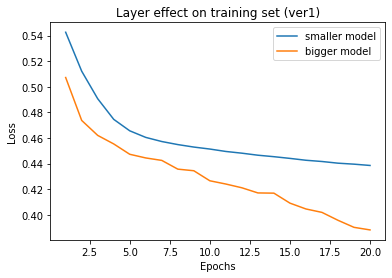

In [109]:
# Layer effect on training loss


import matplotlib.pyplot as plt

history_dict_h1n1_ver1_s = history_h1n1_ver1_s.history
history_dict_h1n1_ver1_b = history_h1n1_ver1_b.history

loss_values_h1n1_ver1_s = history_dict_h1n1_ver1_s["loss"]
loss_values_h1n1_ver1_b = history_dict_h1n1_ver1_b["loss"]

epochs = range(1, len(loss_values_h1n1_ver1_s) + 1)


plt.plot(epochs, loss_values_h1n1_ver1_s, label="smaller model")
plt.plot(epochs, loss_values_h1n1_ver1_b, label="bigger model")


plt.title("Layer effect on training set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

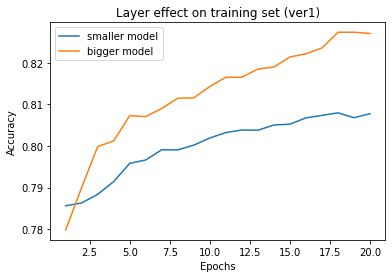

In [110]:
# Layer effect on training accuracy


import matplotlib.pyplot as plt



acc_values_h1n1_ver1_s = history_dict_h1n1_ver1_s["accuracy"]
acc_values_h1n1_ver1_b = history_dict_h1n1_ver1_b["accuracy"]

epochs = range(1, len(acc_values_h1n1_ver1_s) + 1)


plt.plot(epochs, acc_values_h1n1_ver1_s, label="smaller model")
plt.plot(epochs, acc_values_h1n1_ver1_b, label="bigger model")


plt.title("Layer effect on training set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

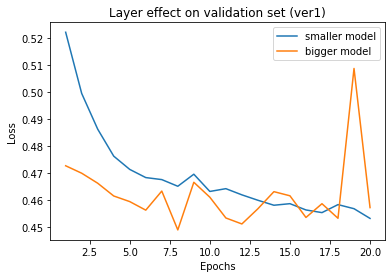

In [111]:
# Layer effect on validation loss


import matplotlib.pyplot as plt



val_loss_values_h1n1_ver1_s = history_dict_h1n1_ver1_s["val_loss"]
val_loss_values_h1n1_ver1_b = history_dict_h1n1_ver1_b["val_loss"]

epochs = range(1, len(val_loss_values_h1n1_ver1_s) + 1)


plt.plot(epochs, val_loss_values_h1n1_ver1_s, label="smaller model")
plt.plot(epochs, val_loss_values_h1n1_ver1_b, label="bigger model")


plt.title("Layer effect on validation set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

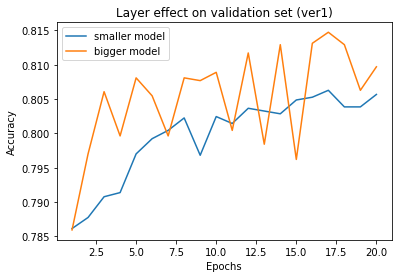

In [112]:
# Layer effect on validation accuracy


import matplotlib.pyplot as plt



val_acc_values_h1n1_ver1_s = history_dict_h1n1_ver1_s["val_accuracy"]
val_acc_values_h1n1_ver1_b = history_dict_h1n1_ver1_b["val_accuracy"]

epochs = range(1, len(val_acc_values_h1n1_ver1_s) + 1)


plt.plot(epochs, val_acc_values_h1n1_ver1_s, label="smaller model")
plt.plot(epochs, val_acc_values_h1n1_ver1_b, label="bigger model")


plt.title("Layer effect on validation set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

## **L1, L2 regularization effect**

**layer 8개 + L1 regularization 1개**

In [9]:
## loss: 0.4478 - accuracy: 0.8116 - val_loss: 0.4607 - val_accuracy: 0.8091
## loss: 0.4432 - accuracy: 0.8161 - val_loss: 0.4617 - val_accuracy: 0.8069
## loss: 0.4400 - accuracy: 0.8159 - val_loss: 0.4609 - val_accuracy: 0.8085



from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_L1_1 = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_L1_1.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_L1_1 = model_h1n1_ver1_L1_1.fit(x_train_h1n1_ver1,
                                                  y_train_h1n1_ver1,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 2s 11ms/step - loss: 1.9107 - accuracy: 0.7859 - val_loss: 1.4448 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 0s 5ms/step - loss: 1.0912 - accuracy: 0.7872 - val_loss: 0.8175 - val_accuracy: 0.8019
Epoch 3/20
39/39 [==============================] - 0s 6ms/step - loss: 0.6675 - accuracy: 0.7953 - val_loss: 0.5869 - val_accuracy: 0.7763
Epoch 4/20
39/39 [==============================] - 0s 5ms/step - loss: 0.5382 - accuracy: 0.7981 - val_loss: 0.5253 - val_accuracy: 0.7998
Epoch 5/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5060 - accuracy: 0.8037 - val_loss: 0.5092 - val_accuracy: 0.7859
Epoch 6/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4910 - accuracy: 0.8006 - val_loss: 0.4921 - val_accuracy: 0.8014
Epoch 7/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4799 - accuracy: 0.8048 - val_loss: 0.4955 - val_accuracy: 0.7880
Epoch 8/20
39/39 [=

**layer 8개 + L1 regularization 2개**

In [10]:
## loss: 0.4559 - accuracy: 0.8156 - val_loss: 0.4747 - val_accuracy: 0.8095
## loss: 0.4521 - accuracy: 0.8152 - val_loss: 0.4667 - val_accuracy: 0.8115
## loss: 0.4504 - accuracy: 0.8168 - val_loss: 0.4705 - val_accuracy: 0.8111



from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_L1_2 = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_L1_2.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_L1_2 = model_h1n1_ver1_L1_2.fit(x_train_h1n1_ver1,
                                                  y_train_h1n1_ver1,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 1s 10ms/step - loss: 2.0396 - accuracy: 0.7734 - val_loss: 1.5200 - val_accuracy: 0.7932
Epoch 2/20
39/39 [==============================] - 0s 5ms/step - loss: 1.1960 - accuracy: 0.7931 - val_loss: 0.9368 - val_accuracy: 0.7723
Epoch 3/20
39/39 [==============================] - 0s 6ms/step - loss: 0.7432 - accuracy: 0.7988 - val_loss: 0.6336 - val_accuracy: 0.7934
Epoch 4/20
39/39 [==============================] - 0s 5ms/step - loss: 0.5943 - accuracy: 0.7963 - val_loss: 0.5700 - val_accuracy: 0.7980
Epoch 5/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5431 - accuracy: 0.8060 - val_loss: 0.5354 - val_accuracy: 0.8004
Epoch 6/20
39/39 [==============================] - 0s 5ms/step - loss: 0.5183 - accuracy: 0.8040 - val_loss: 0.5541 - val_accuracy: 0.7710
Epoch 7/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4985 - accuracy: 0.8089 - val_loss: 0.5056 - val_accuracy: 0.8061
Epoch 8/20
39/39 [=

**layer 8개 + L2 regularization 1개**

In [11]:
## loss: 0.4100 - accuracy: 0.8219 - val_loss: 0.4545 - val_accuracy: 0.7978
## loss: 0.4119 - accuracy: 0.8213 - val_loss: 0.4513 - val_accuracy: 0.8087
## loss: 0.4046 - accuracy: 0.8270 - val_loss: 0.4522 - val_accuracy: 0.8041




from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_L2_1 = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_L2_1.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_L2_1 = model_h1n1_ver1_L2_1.fit(x_train_h1n1_ver1,
                                                  y_train_h1n1_ver1,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 1s 11ms/step - loss: 0.6340 - accuracy: 0.7725 - val_loss: 0.5754 - val_accuracy: 0.7990
Epoch 2/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5311 - accuracy: 0.7937 - val_loss: 0.5225 - val_accuracy: 0.7918
Epoch 3/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4931 - accuracy: 0.7986 - val_loss: 0.4871 - val_accuracy: 0.8010
Epoch 4/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4777 - accuracy: 0.8004 - val_loss: 0.4747 - val_accuracy: 0.8047
Epoch 5/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4670 - accuracy: 0.8047 - val_loss: 0.4702 - val_accuracy: 0.8031
Epoch 6/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4580 - accuracy: 0.8083 - val_loss: 0.4822 - val_accuracy: 0.7954
Epoch 7/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4532 - accuracy: 0.8081 - val_loss: 0.4602 - val_accuracy: 0.8043
Epoch 8/20
39/39 [=

**layer 8개 + L2 regularization 2개**

In [12]:
## loss: 0.4104 - accuracy: 0.8234 - val_loss: 0.4648 - val_accuracy: 0.8115
## loss: 0.4155 - accuracy: 0.8243 - val_loss: 0.4608 - val_accuracy: 0.8071
## loss: 0.4105 - accuracy: 0.8206 - val_loss: 0.4517 - val_accuracy: 0.8047



from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_L2_2 = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_L2_2.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_L2_2 = model_h1n1_ver1_L2_2.fit(x_train_h1n1_ver1,
                                                  y_train_h1n1_ver1,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 1s 10ms/step - loss: 0.6652 - accuracy: 0.7701 - val_loss: 0.5768 - val_accuracy: 0.7938
Epoch 2/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5549 - accuracy: 0.7960 - val_loss: 0.5272 - val_accuracy: 0.8014
Epoch 3/20
39/39 [==============================] - 0s 7ms/step - loss: 0.5118 - accuracy: 0.7999 - val_loss: 0.5112 - val_accuracy: 0.8035
Epoch 4/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4892 - accuracy: 0.8010 - val_loss: 0.5030 - val_accuracy: 0.8039
Epoch 5/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4794 - accuracy: 0.8045 - val_loss: 0.4813 - val_accuracy: 0.8069
Epoch 6/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4687 - accuracy: 0.8065 - val_loss: 0.4740 - val_accuracy: 0.8075
Epoch 7/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4631 - accuracy: 0.8063 - val_loss: 0.4703 - val_accuracy: 0.8047
Epoch 8/20
39/39 [=

**layer 8개 + L1&L2 regularization 1개**

In [13]:
## loss: 0.4500 - accuracy: 0.8158 - val_loss: 0.4707 - val_accuracy: 0.8127
## loss: 0.4509 - accuracy: 0.8160 - val_loss: 0.4650 - val_accuracy: 0.8103
## loss: 0.4507 - accuracy: 0.8181 - val_loss: 0.4669 - val_accuracy: 0.8101



from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_L12 = keras.Sequential([
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001)),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001)),
                                        layers.Dense(16, activation = "relu"),
                                        layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_L12.compile(optimizer = "rmsprop",
                            loss = "binary_crossentropy",
                            metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_L12 = model_h1n1_ver1_L12.fit(x_train_h1n1_ver1,
                                                y_train_h1n1_ver1,
                                                epochs = 20,
                                                batch_size = 512,
                                                validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 1s 11ms/step - loss: 2.1158 - accuracy: 0.7852 - val_loss: 1.5381 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 0s 6ms/step - loss: 1.1933 - accuracy: 0.7888 - val_loss: 0.8924 - val_accuracy: 0.7900
Epoch 3/20
39/39 [==============================] - 0s 6ms/step - loss: 0.7268 - accuracy: 0.7956 - val_loss: 0.6188 - val_accuracy: 0.8077
Epoch 4/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5797 - accuracy: 0.7991 - val_loss: 0.5644 - val_accuracy: 0.8075
Epoch 5/20
39/39 [==============================] - 0s 5ms/step - loss: 0.5347 - accuracy: 0.8008 - val_loss: 0.5322 - val_accuracy: 0.7972
Epoch 6/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5079 - accuracy: 0.8060 - val_loss: 0.5102 - val_accuracy: 0.8065
Epoch 7/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4954 - accuracy: 0.8058 - val_loss: 0.5070 - val_accuracy: 0.8109
Epoch 8/20
39/39 [=

### visualize

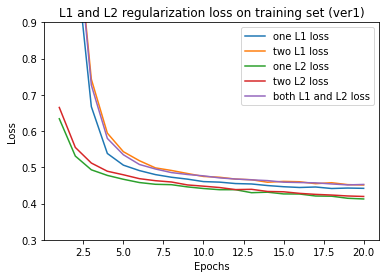

In [14]:
# L1, L2 regularization effect on training loss


import matplotlib.pyplot as plt

history_dict_h1n1_ver1_L1_1 = history_h1n1_ver1_L1_1.history
history_dict_h1n1_ver1_L1_2 = history_h1n1_ver1_L1_2.history
history_dict_h1n1_ver1_L2_1 = history_h1n1_ver1_L2_1.history
history_dict_h1n1_ver1_L2_2 = history_h1n1_ver1_L2_2.history
history_dict_h1n1_ver1_L12 = history_h1n1_ver1_L12.history

loss_values_h1n1_ver1_L1_1 = history_dict_h1n1_ver1_L1_1["loss"]
loss_values_h1n1_ver1_L1_2 = history_dict_h1n1_ver1_L1_2["loss"]
loss_values_h1n1_ver1_L2_1 = history_dict_h1n1_ver1_L2_1["loss"]
loss_values_h1n1_ver1_L2_2 = history_dict_h1n1_ver1_L2_2["loss"]
loss_values_h1n1_ver1_L12 = history_dict_h1n1_ver1_L12["loss"]


epochs = range(1, len(loss_values_h1n1_ver1_L1_1) + 1)


plt.plot(epochs, loss_values_h1n1_ver1_L1_1, label="one L1 loss")
plt.plot(epochs, loss_values_h1n1_ver1_L1_2, label="two L1 loss")
plt.plot(epochs, loss_values_h1n1_ver1_L2_1, label="one L2 loss")
plt.plot(epochs, loss_values_h1n1_ver1_L2_2, label="two L2 loss")
plt.plot(epochs, loss_values_h1n1_ver1_L12, label="both L1 and L2 loss")


plt.title("L1 and L2 regularization loss on training set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.ylim([0.3,0.9])
plt.legend()
plt.show()

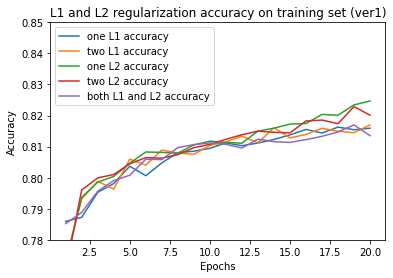

In [15]:
# L1, L2 regularization effect on training accuracy


import matplotlib.pyplot as plt


acc_values_h1n1_ver1_L1_1 = history_dict_h1n1_ver1_L1_1["accuracy"]
acc_values_h1n1_ver1_L1_2 = history_dict_h1n1_ver1_L1_2["accuracy"]
acc_values_h1n1_ver1_L2_1 = history_dict_h1n1_ver1_L2_1["accuracy"]
acc_values_h1n1_ver1_L2_2 = history_dict_h1n1_ver1_L2_2["accuracy"]
acc_values_h1n1_ver1_L12 = history_dict_h1n1_ver1_L12["accuracy"]

epochs = range(1, len(acc_values_h1n1_ver1_L1_1) + 1)


plt.plot(epochs, acc_values_h1n1_ver1_L1_1, label="one L1 accuracy")
plt.plot(epochs, acc_values_h1n1_ver1_L1_2, label="two L1 accuracy")
plt.plot(epochs, acc_values_h1n1_ver1_L2_1, label="one L2 accuracy")
plt.plot(epochs, acc_values_h1n1_ver1_L2_2, label="two L2 accuracy")
plt.plot(epochs, acc_values_h1n1_ver1_L12, label="both L1 and L2 accuracy")

plt.title("L1 and L2 regularization accuracy on training set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.ylim([0.78, 0.85])
plt.legend()
plt.show()

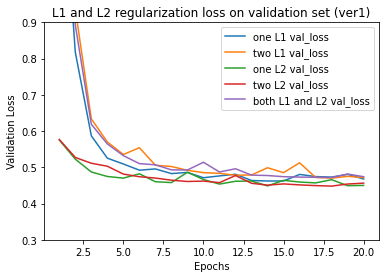

In [16]:
# L1, L2 regularization effect on validation loss


import matplotlib.pyplot as plt

history_dict_h1n1_ver1_L1_1 = history_h1n1_ver1_L1_1.history
history_dict_h1n1_ver1_L1_2 = history_h1n1_ver1_L1_2.history
history_dict_h1n1_ver1_L2_1 = history_h1n1_ver1_L2_1.history
history_dict_h1n1_ver1_L2_2 = history_h1n1_ver1_L2_2.history
history_dict_h1n1_ver1_L12 = history_h1n1_ver1_L12.history

val_loss_values_h1n1_ver1_L1_1 = history_dict_h1n1_ver1_L1_1["val_loss"]
val_loss_values_h1n1_ver1_L1_2 = history_dict_h1n1_ver1_L1_2["val_loss"]
val_loss_values_h1n1_ver1_L2_1 = history_dict_h1n1_ver1_L2_1["val_loss"]
val_loss_values_h1n1_ver1_L2_2 = history_dict_h1n1_ver1_L2_2["val_loss"]
val_loss_values_h1n1_ver1_L12 = history_dict_h1n1_ver1_L12["val_loss"]


epochs = range(1, len(val_loss_values_h1n1_ver1_L1_1) + 1)


plt.plot(epochs, val_loss_values_h1n1_ver1_L1_1, label="one L1 val_loss")
plt.plot(epochs, val_loss_values_h1n1_ver1_L1_2, label="two L1 val_loss")
plt.plot(epochs, val_loss_values_h1n1_ver1_L2_1, label="one L2 val_loss")
plt.plot(epochs, val_loss_values_h1n1_ver1_L2_2, label="two L2 val_loss")
plt.plot(epochs, val_loss_values_h1n1_ver1_L12, label="both L1 and L2 val_loss")


plt.title("L1 and L2 regularization loss on validation set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.ylim([0.3,0.9])
plt.legend()
plt.show()

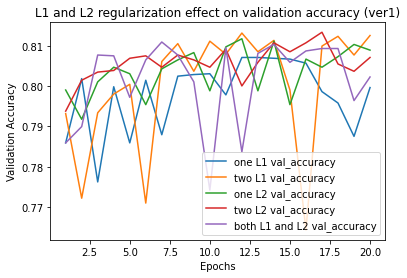

In [17]:
# L1, L2 regularization effect on validation accuracy


import matplotlib.pyplot as plt

history_dict_h1n1_ver1_L1_1 = history_h1n1_ver1_L1_1.history
history_dict_h1n1_ver1_L1_2 = history_h1n1_ver1_L1_2.history
history_dict_h1n1_ver1_L2_1 = history_h1n1_ver1_L2_1.history
history_dict_h1n1_ver1_L2_2 = history_h1n1_ver1_L2_2.history
history_dict_h1n1_ver1_L12 = history_h1n1_ver1_L12.history


val_acc_values_h1n1_ver1_L1_1 = history_dict_h1n1_ver1_L1_1["val_accuracy"]
val_acc_values_h1n1_ver1_L1_2 = history_dict_h1n1_ver1_L1_2["val_accuracy"]
val_acc_values_h1n1_ver1_L2_1 = history_dict_h1n1_ver1_L2_1["val_accuracy"]
val_acc_values_h1n1_ver1_L2_2 = history_dict_h1n1_ver1_L2_2["val_accuracy"]
val_acc_values_h1n1_ver1_L12 = history_dict_h1n1_ver1_L12["val_accuracy"]



epochs = range(1, len(val_acc_values_h1n1_ver1_L1_1) + 1)


plt.plot(epochs, val_acc_values_h1n1_ver1_L1_1, label="one L1 val_accuracy")
plt.plot(epochs, val_acc_values_h1n1_ver1_L1_2, label="two L1 val_accuracy")
plt.plot(epochs, val_acc_values_h1n1_ver1_L2_1, label="one L2 val_accuracy")
plt.plot(epochs, val_acc_values_h1n1_ver1_L2_2, label="two L2 val_accuracy")
plt.plot(epochs, val_acc_values_h1n1_ver1_L12, label="both L1 and L2 val_accuracy")


plt.title("L1 and L2 regularization effect on validation accuracy (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

## **Hyperparameter effect**

**0.005**

In [18]:
## 0.005
## loss: 0.4081 - accuracy: 0.8263 - val_loss: 0.4562 - val_accuracy: 0.8125
## loss: 0.4136 - accuracy: 0.8236 - val_loss: 0.4530 - val_accuracy: 0.8107
## loss: 0.4016 - accuracy: 0.8263 - val_loss: 0.4890 - val_accuracy: 0.7708


from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_one = keras.Sequential([
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.005)),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.005)),
                                        layers.Dense(16, activation = "relu"),
                                        layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_one.compile(optimizer = "rmsprop",
                            loss = "binary_crossentropy",
                            metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_one = model_h1n1_ver1_one.fit(x_train_h1n1_ver1,
                                                y_train_h1n1_ver1,
                                                epochs = 20,
                                                batch_size = 512,
                                                validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 2s 20ms/step - loss: 1.1107 - accuracy: 0.7859 - val_loss: 0.8490 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 0s 11ms/step - loss: 0.7279 - accuracy: 0.7920 - val_loss: 0.6593 - val_accuracy: 0.7855
Epoch 3/20
39/39 [==============================] - 1s 13ms/step - loss: 0.5703 - accuracy: 0.8018 - val_loss: 0.5354 - val_accuracy: 0.7992
Epoch 4/20
39/39 [==============================] - 0s 11ms/step - loss: 0.5110 - accuracy: 0.8007 - val_loss: 0.5064 - val_accuracy: 0.8063
Epoch 5/20
39/39 [==============================] - 0s 12ms/step - loss: 0.4886 - accuracy: 0.8030 - val_loss: 0.4864 - val_accuracy: 0.8073
Epoch 6/20
39/39 [==============================] - 0s 11ms/step - loss: 0.4699 - accuracy: 0.8062 - val_loss: 0.4887 - val_accuracy: 0.7914
Epoch 7/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4638 - accuracy: 0.8096 - val_loss: 0.5280 - val_accuracy: 0.7505
Epoch 8/20
39/

**0.002**

In [19]:
## 0.002
## loss: 0.4007 - accuracy: 0.8284 - val_loss: 0.4547 - val_accuracy: 0.8119
## loss: 0.4005 - accuracy: 0.8272 - val_loss: 0.4566 - val_accuracy: 0.8067
## loss: 0.4068 - accuracy: 0.8259 - val_loss: 0.4733 - val_accuracy: 0.8087



from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_two = keras.Sequential([
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.002)),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.002)),
                                        layers.Dense(16, activation = "relu"),
                                        layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_two.compile(optimizer = "rmsprop",
                            loss = "binary_crossentropy",
                            metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_two = model_h1n1_ver1_two.fit(x_train_h1n1_ver1,
                                                y_train_h1n1_ver1,
                                                epochs = 20,
                                                batch_size = 512,
                                                validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 1s 11ms/step - loss: 0.7726 - accuracy: 0.7748 - val_loss: 0.6448 - val_accuracy: 0.7916
Epoch 2/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5969 - accuracy: 0.7942 - val_loss: 0.5501 - val_accuracy: 0.8010
Epoch 3/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5273 - accuracy: 0.7990 - val_loss: 0.5077 - val_accuracy: 0.8055
Epoch 4/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4961 - accuracy: 0.8025 - val_loss: 0.4885 - val_accuracy: 0.8059
Epoch 5/20
39/39 [==============================] - 0s 7ms/step - loss: 0.4789 - accuracy: 0.8063 - val_loss: 0.4782 - val_accuracy: 0.8049
Epoch 6/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4691 - accuracy: 0.8065 - val_loss: 0.4751 - val_accuracy: 0.8071
Epoch 7/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4596 - accuracy: 0.8095 - val_loss: 0.4697 - val_accuracy: 0.7984
Epoch 8/20
39/39 [=

**0.001(original)**

In [20]:
## 0.001
## loss: 0.4076 - accuracy: 0.8232 - val_loss: 0.4590 - val_accuracy: 0.8065
## loss: 0.3939 - accuracy: 0.8296 - val_loss: 0.4674 - val_accuracy: 0.8053
## loss: 0.4100 - accuracy: 0.8231 - val_loss: 0.4600 - val_accuracy: 0.8021



from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_three = keras.Sequential([
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(16, activation = "relu"),
                                          layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_three.compile(optimizer = "rmsprop",
                               loss = "binary_crossentropy",
                               metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_three = model_h1n1_ver1_three.fit(x_train_h1n1_ver1,
                                                     y_train_h1n1_ver1,
                                                     epochs = 20,
                                                     batch_size = 512,
                                                     validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 3s 23ms/step - loss: 0.6436 - accuracy: 0.7872 - val_loss: 0.5730 - val_accuracy: 0.7922
Epoch 2/20
39/39 [==============================] - 0s 10ms/step - loss: 0.5485 - accuracy: 0.7936 - val_loss: 0.5336 - val_accuracy: 0.8065
Epoch 3/20
39/39 [==============================] - 0s 10ms/step - loss: 0.5060 - accuracy: 0.8026 - val_loss: 0.5260 - val_accuracy: 0.7980
Epoch 4/20
39/39 [==============================] - 0s 11ms/step - loss: 0.4901 - accuracy: 0.8008 - val_loss: 0.4862 - val_accuracy: 0.8055
Epoch 5/20
39/39 [==============================] - 1s 13ms/step - loss: 0.4777 - accuracy: 0.8055 - val_loss: 0.4790 - val_accuracy: 0.8061
Epoch 6/20
39/39 [==============================] - 0s 10ms/step - loss: 0.4687 - accuracy: 0.8072 - val_loss: 0.4920 - val_accuracy: 0.7922
Epoch 7/20
39/39 [==============================] - 0s 9ms/step - loss: 0.4633 - accuracy: 0.8068 - val_loss: 0.4755 - val_accuracy: 0.7970
Epoch 8/20
39/

**0.0005**

In [21]:
## 0.0005
## loss: 0.4115 - accuracy: 0.8228 - val_loss: 0.4528 - val_accuracy: 0.8065
## loss: 0.4084 - accuracy: 0.8241 - val_loss: 0.4575 - val_accuracy: 0.7992
## loss: 0.4106 - accuracy: 0.8241 - val_loss: 0.4538 - val_accuracy: 0.8117



from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_four = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.0005)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0005)),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_four.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_four = model_h1n1_ver1_four.fit(x_train_h1n1_ver1,
                                                  y_train_h1n1_ver1,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 3s 11ms/step - loss: 0.5792 - accuracy: 0.7860 - val_loss: 0.5364 - val_accuracy: 0.7978
Epoch 2/20
39/39 [==============================] - 0s 7ms/step - loss: 0.5141 - accuracy: 0.7967 - val_loss: 0.5015 - val_accuracy: 0.8041
Epoch 3/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4901 - accuracy: 0.8006 - val_loss: 0.4879 - val_accuracy: 0.8049
Epoch 4/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4762 - accuracy: 0.8027 - val_loss: 0.4918 - val_accuracy: 0.8055
Epoch 5/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4671 - accuracy: 0.8046 - val_loss: 0.4728 - val_accuracy: 0.8035
Epoch 6/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4582 - accuracy: 0.8072 - val_loss: 0.4773 - val_accuracy: 0.8051
Epoch 7/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4539 - accuracy: 0.8090 - val_loss: 0.4647 - val_accuracy: 0.8085
Epoch 8/20
39/39 [=

**0.0001**

In [22]:
## 0.0001
## loss: 0.4093 - accuracy: 0.8249 - val_loss: 0.4621 - val_accuracy: 0.8113
## loss: 0.4050 - accuracy: 0.8230 - val_loss: 0.4580 - val_accuracy: 0.8095
## loss: 0.4038 - accuracy: 0.8252 - val_loss: 0.4700 - val_accuracy: 0.8067



from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_five = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.0001)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0001)),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_five.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_five = model_h1n1_ver1_five.fit(x_train_h1n1_ver1,
                                                  y_train_h1n1_ver1,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 1s 10ms/step - loss: 0.5503 - accuracy: 0.7579 - val_loss: 0.4940 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4822 - accuracy: 0.7980 - val_loss: 0.4761 - val_accuracy: 0.8049
Epoch 3/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4710 - accuracy: 0.8015 - val_loss: 0.4748 - val_accuracy: 0.7944
Epoch 4/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4636 - accuracy: 0.8039 - val_loss: 0.4669 - val_accuracy: 0.8031
Epoch 5/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4562 - accuracy: 0.8057 - val_loss: 0.4617 - val_accuracy: 0.8051
Epoch 6/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4522 - accuracy: 0.8083 - val_loss: 0.4759 - val_accuracy: 0.7934
Epoch 7/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4501 - accuracy: 0.8086 - val_loss: 0.4731 - val_accuracy: 0.8075
Epoch 8/20
39/39 [=

### visualize

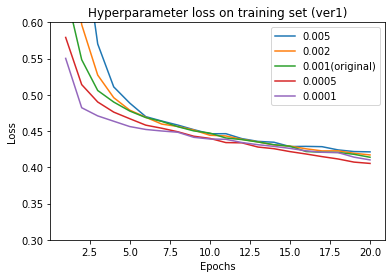

In [23]:
# Hyperparameter effect on training loss


import matplotlib.pyplot as plt

history_dict_h1n1_ver1_one = history_h1n1_ver1_one.history
history_dict_h1n1_ver1_two = history_h1n1_ver1_two.history
history_dict_h1n1_ver1_three = history_h1n1_ver1_three.history
history_dict_h1n1_ver1_four = history_h1n1_ver1_four.history
history_dict_h1n1_ver1_five = history_h1n1_ver1_five.history

loss_values_h1n1_ver1_one = history_dict_h1n1_ver1_one["loss"]
loss_values_h1n1_ver1_two = history_dict_h1n1_ver1_two["loss"]
loss_values_h1n1_ver1_three = history_dict_h1n1_ver1_three["loss"]
loss_values_h1n1_ver1_four = history_dict_h1n1_ver1_four["loss"]
loss_values_h1n1_ver1_five = history_dict_h1n1_ver1_five["loss"]


epochs = range(1, len(loss_values_h1n1_ver1_one) + 1)


plt.plot(epochs, loss_values_h1n1_ver1_one, label="0.005")
plt.plot(epochs, loss_values_h1n1_ver1_two, label="0.002")
plt.plot(epochs, loss_values_h1n1_ver1_three, label="0.001(original)")
plt.plot(epochs, loss_values_h1n1_ver1_four, label="0.0005")
plt.plot(epochs, loss_values_h1n1_ver1_five, label="0.0001")


plt.title("Hyperparameter loss on training set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.ylim([0.3,0.6])
plt.legend()
plt.show()

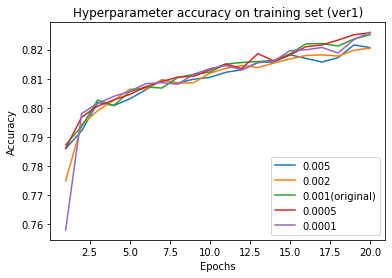

In [24]:
# Hyperparameter effect on training accuracy


import matplotlib.pyplot as plt


acc_values_h1n1_ver1_one = history_dict_h1n1_ver1_one["accuracy"]
acc_values_h1n1_ver1_two = history_dict_h1n1_ver1_two["accuracy"]
acc_values_h1n1_ver1_three = history_dict_h1n1_ver1_three["accuracy"]
acc_values_h1n1_ver1_four = history_dict_h1n1_ver1_four["accuracy"]
acc_values_h1n1_ver1_five = history_dict_h1n1_ver1_five["accuracy"]

epochs = range(1, len(acc_values_h1n1_ver1_one) + 1)


plt.plot(epochs, acc_values_h1n1_ver1_one, label="0.005")
plt.plot(epochs, acc_values_h1n1_ver1_two, label="0.002")
plt.plot(epochs, acc_values_h1n1_ver1_three, label="0.001(original)")
plt.plot(epochs, acc_values_h1n1_ver1_four, label="0.0005")
plt.plot(epochs, acc_values_h1n1_ver1_five, label="0.0001")

plt.title("Hyperparameter accuracy on training set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.78, 0.85])
plt.legend()
plt.show()

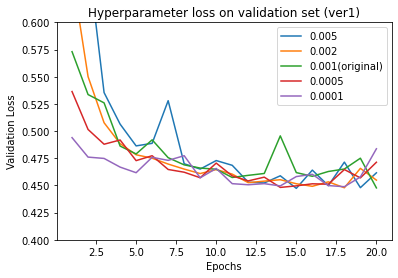

In [25]:
# Hyperparameter effect on validation loss


import matplotlib.pyplot as plt


val_loss_values_h1n1_ver1_one = history_dict_h1n1_ver1_one["val_loss"]
val_loss_values_h1n1_ver1_two = history_dict_h1n1_ver1_two["val_loss"]
val_loss_values_h1n1_ver1_three = history_dict_h1n1_ver1_three["val_loss"]
val_loss_values_h1n1_ver1_four = history_dict_h1n1_ver1_four["val_loss"]
val_loss_values_h1n1_ver1_five = history_dict_h1n1_ver1_five["val_loss"]


epochs = range(1, len(val_loss_values_h1n1_ver1_one) + 1)


plt.plot(epochs, val_loss_values_h1n1_ver1_one, label="0.005")
plt.plot(epochs, val_loss_values_h1n1_ver1_two, label="0.002")
plt.plot(epochs, val_loss_values_h1n1_ver1_three, label="0.001(original)")
plt.plot(epochs, val_loss_values_h1n1_ver1_four, label="0.0005")
plt.plot(epochs, val_loss_values_h1n1_ver1_five, label="0.0001")


plt.title("Hyperparameter loss on validation set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.ylim([0.4,0.6])
plt.legend()
plt.show()

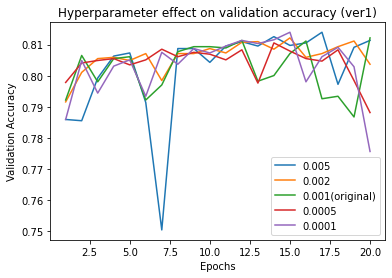

In [26]:
# Hyperparameter effect on validation accuracy


import matplotlib.pyplot as plt



val_acc_values_h1n1_ver1_one = history_dict_h1n1_ver1_one["val_accuracy"]
val_acc_values_h1n1_ver1_two = history_dict_h1n1_ver1_two["val_accuracy"]
val_acc_values_h1n1_ver1_three = history_dict_h1n1_ver1_three["val_accuracy"]
val_acc_values_h1n1_ver1_four = history_dict_h1n1_ver1_four["val_accuracy"]
val_acc_values_h1n1_ver1_five = history_dict_h1n1_ver1_five["val_accuracy"]



epochs = range(1, len(val_acc_values_h1n1_ver1_one) + 1)


plt.plot(epochs, val_acc_values_h1n1_ver1_one, label="0.005")
plt.plot(epochs, val_acc_values_h1n1_ver1_two, label="0.002")
plt.plot(epochs, val_acc_values_h1n1_ver1_three, label="0.001(original)")
plt.plot(epochs, val_acc_values_h1n1_ver1_four, label="0.0005")
plt.plot(epochs, val_acc_values_h1n1_ver1_five, label="0.0001")


plt.title("Hyperparameter effect on validation accuracy (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

## **Dropout effect**

**# dropout = 1**

In [27]:
## one dropout
## loss: 0.4186 - accuracy: 0.8195 - val_loss: 0.4526 - val_accuracy: 0.8041
## loss: 0.4119 - accuracy: 0.8216 - val_loss: 0.4562 - val_accuracy: 0.7986
## loss: 0.4155 - accuracy: 0.8216 - val_loss: 0.4561 - val_accuracy: 0.8061


from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_onedr = keras.Sequential([
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dropout(0.5),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(16, activation = "relu"),
                                          layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_onedr.compile(optimizer = "rmsprop",
                              loss = "binary_crossentropy",
                              metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_onedr = model_h1n1_ver1_onedr.fit(x_train_h1n1_ver1,
                                                    y_train_h1n1_ver1,
                                                    epochs = 20,
                                                    batch_size = 512,
                                                    validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 2s 11ms/step - loss: 0.6493 - accuracy: 0.7821 - val_loss: 0.5727 - val_accuracy: 0.7857
Epoch 2/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5513 - accuracy: 0.7889 - val_loss: 0.5289 - val_accuracy: 0.8008
Epoch 3/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5130 - accuracy: 0.7982 - val_loss: 0.5195 - val_accuracy: 0.8027
Epoch 4/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4951 - accuracy: 0.7981 - val_loss: 0.4895 - val_accuracy: 0.8008
Epoch 5/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4795 - accuracy: 0.8024 - val_loss: 0.4838 - val_accuracy: 0.8027
Epoch 6/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4711 - accuracy: 0.8055 - val_loss: 0.4849 - val_accuracy: 0.7992
Epoch 7/20
39/39 [==============================] - 0s 7ms/step - loss: 0.4608 - accuracy: 0.8080 - val_loss: 0.4679 - val_accuracy: 0.8089
Epoch 8/20
39/39 [=

**# dropout = 2**

In [28]:
## two dropout
## loss: 0.4225 - accuracy: 0.8194 - val_loss: 0.4630 - val_accuracy: 0.8023
## loss: 0.4112 - accuracy: 0.8211 - val_loss: 0.4725 - val_accuracy: 0.7793
## loss: 0.4187 - accuracy: 0.8181 - val_loss: 0.4520 - val_accuracy: 0.8109


from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_twodr = keras.Sequential([
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dropout(0.5),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dropout(0.5),
                                          layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(16, activation = "relu"),
                                          layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_twodr.compile(optimizer = "rmsprop",
                              loss = "binary_crossentropy",
                              metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_twodr = model_h1n1_ver1_twodr.fit(x_train_h1n1_ver1,
                                                    y_train_h1n1_ver1,
                                                    epochs = 20,
                                                    batch_size = 512,
                                                    validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 2s 12ms/step - loss: 0.6569 - accuracy: 0.7822 - val_loss: 0.6362 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5637 - accuracy: 0.7859 - val_loss: 0.5478 - val_accuracy: 0.7859
Epoch 3/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5209 - accuracy: 0.7859 - val_loss: 0.5469 - val_accuracy: 0.7859
Epoch 4/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4992 - accuracy: 0.7859 - val_loss: 0.5193 - val_accuracy: 0.7859
Epoch 5/20
39/39 [==============================] - 0s 7ms/step - loss: 0.4851 - accuracy: 0.7859 - val_loss: 0.4839 - val_accuracy: 0.7859
Epoch 6/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4775 - accuracy: 0.7893 - val_loss: 0.4854 - val_accuracy: 0.8061
Epoch 7/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4669 - accuracy: 0.8017 - val_loss: 0.4831 - val_accuracy: 0.7882
Epoch 8/20
39/39 [=

**# dropout = 3**

In [29]:
## three dropout
## loss: 0.4308 - accuracy: 0.7859 - val_loss: 0.4954 - val_accuracy: 0.7859
## loss: 0.4264 - accuracy: 0.8120 - val_loss: 0.4659 - val_accuracy: 0.7861
## loss: 0.4252 - accuracy: 0.8103 - val_loss: 0.4626 - val_accuracy: 0.8131


from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_threedr = keras.Sequential([
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dropout(0.5),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dropout(0.5),
                                            layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                            layers.Dropout(0.5),
                                            layers.Dense(16, activation = "relu"),
                                            layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_threedr.compile(optimizer = "rmsprop",
                                loss = "binary_crossentropy",
                                metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_threedr = model_h1n1_ver1_threedr.fit(x_train_h1n1_ver1,
                                                        y_train_h1n1_ver1,
                                                        epochs = 20,
                                                        batch_size = 512,
                                                        validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 2s 11ms/step - loss: 0.7063 - accuracy: 0.7596 - val_loss: 0.5787 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5963 - accuracy: 0.7849 - val_loss: 0.5380 - val_accuracy: 0.7859
Epoch 3/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5488 - accuracy: 0.7858 - val_loss: 0.5148 - val_accuracy: 0.7859
Epoch 4/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5212 - accuracy: 0.7869 - val_loss: 0.5243 - val_accuracy: 0.7859
Epoch 5/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5014 - accuracy: 0.7926 - val_loss: 0.4875 - val_accuracy: 0.7900
Epoch 6/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4896 - accuracy: 0.7959 - val_loss: 0.4835 - val_accuracy: 0.8083
Epoch 7/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4743 - accuracy: 0.7990 - val_loss: 0.4715 - val_accuracy: 0.8083
Epoch 8/20
39/39 [=

### visualize

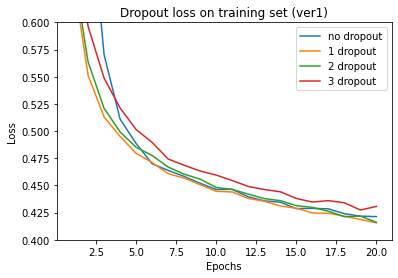

In [30]:
# Dropout effect on training loss


import matplotlib.pyplot as plt

history_dict_h1n1_ver1_onedr = history_h1n1_ver1_onedr.history
history_dict_h1n1_ver1_twodr = history_h1n1_ver1_twodr.history
history_dict_h1n1_ver1_threedr = history_h1n1_ver1_threedr.history

loss_values_h1n1_ver1_onedr = history_dict_h1n1_ver1_onedr["loss"]
loss_values_h1n1_ver1_twodr = history_dict_h1n1_ver1_twodr["loss"]
loss_values_h1n1_ver1_threedr = history_dict_h1n1_ver1_threedr["loss"]

epochs = range(1, len(loss_values_h1n1_ver1_onedr) + 1)


plt.plot(epochs, loss_values_h1n1_ver1_one, label="no dropout")
plt.plot(epochs, loss_values_h1n1_ver1_onedr, label="1 dropout")
plt.plot(epochs, loss_values_h1n1_ver1_twodr, label="2 dropout")
plt.plot(epochs, loss_values_h1n1_ver1_threedr, label="3 dropout")

plt.title("Dropout loss on training set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.ylim([0.4,0.6])
plt.legend()
plt.show()

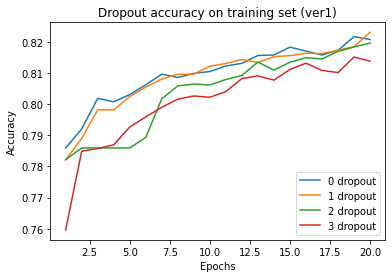

In [31]:
# Dropout effect on training accuracy


import matplotlib.pyplot as plt


acc_values_h1n1_ver1_onedr = history_dict_h1n1_ver1_onedr["accuracy"]
acc_values_h1n1_ver1_twodr = history_dict_h1n1_ver1_twodr["accuracy"]
acc_values_h1n1_ver1_threedr = history_dict_h1n1_ver1_threedr["accuracy"]

epochs = range(1, len(acc_values_h1n1_ver1_onedr) + 1)


plt.plot(epochs, acc_values_h1n1_ver1_one, label="0 dropout")
plt.plot(epochs, acc_values_h1n1_ver1_onedr, label="1 dropout")
plt.plot(epochs, acc_values_h1n1_ver1_twodr, label="2 dropout")
plt.plot(epochs, acc_values_h1n1_ver1_threedr, label="3 dropout")

plt.title("Dropout accuracy on training set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.78, 0.85])
plt.legend()
plt.show()

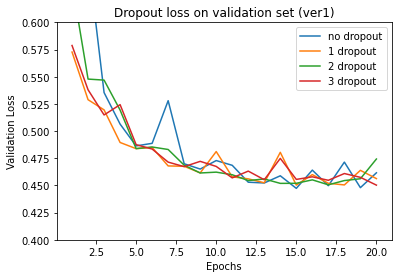

In [32]:
# Dropout effect on validation loss


import matplotlib.pyplot as plt


val_loss_values_h1n1_ver1_onedr = history_dict_h1n1_ver1_onedr["val_loss"]
val_loss_values_h1n1_ver1_twodr = history_dict_h1n1_ver1_twodr["val_loss"]
val_loss_values_h1n1_ver1_threedr = history_dict_h1n1_ver1_threedr["val_loss"]


epochs = range(1, len(val_loss_values_h1n1_ver1_onedr) + 1)


plt.plot(epochs, val_loss_values_h1n1_ver1_one, label="no dropout")
plt.plot(epochs, val_loss_values_h1n1_ver1_onedr, label="1 dropout")
plt.plot(epochs, val_loss_values_h1n1_ver1_twodr, label="2 dropout")
plt.plot(epochs, val_loss_values_h1n1_ver1_threedr, label="3 dropout")

plt.title("Dropout loss on validation set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.ylim([0.4,0.6])
plt.legend()
plt.show()

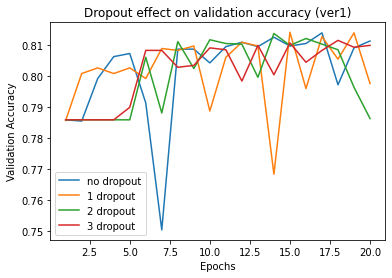

In [33]:
# Dropout effect on validation accuracy


import matplotlib.pyplot as plt



val_acc_values_h1n1_ver1_onedr = history_dict_h1n1_ver1_onedr["val_accuracy"]
val_acc_values_h1n1_ver1_twodr = history_dict_h1n1_ver1_twodr["val_accuracy"]
val_acc_values_h1n1_ver1_threedr = history_dict_h1n1_ver1_threedr["val_accuracy"]



epochs = range(1, len(val_acc_values_h1n1_ver1_onedr) + 1)


plt.plot(epochs, val_acc_values_h1n1_ver1_one, label="no dropout")
plt.plot(epochs, val_acc_values_h1n1_ver1_onedr, label="1 dropout")
plt.plot(epochs, val_acc_values_h1n1_ver1_twodr, label="2 dropout")
plt.plot(epochs, val_acc_values_h1n1_ver1_threedr, label="3 dropout")


plt.title("Dropout effect on validation accuracy (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

# h1n1 model.ver2

In [ ]:
train_h1n1_ver2 = pd.read_csv('/content/drive/MyDrive/22-1_DLAI_Team_Project/train_h1n1_ver2.csv')

In [ ]:
print(train_h1n1_ver2.shape)
train_h1n1_ver2.head()

(24828, 38)


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,region_3,region_4,region_5,region_6,region_7,region_8,region_9,msa_1,msa_2,msa_3
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,0,0,1,0,1,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,1,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,1,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,1,0,1,0


In [ ]:
train_h1n1_ver2.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'chronic_med_condition',
       'child_under_6_months', 'health_worker', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'age_group', 'sex',
       'household_adults', 'household_children', 'h1n1_vaccine', 'race_1',
       'race_2', 'race_3', 'race_4', 'region_0', 'region_1', 'region_2',
       'region_3', 'region_4', 'region_5', 'region_6', 'region_7', 'region_8',
       'region_9', 'msa_1', 'msa_2', 'msa_3'],
      dtype='object')

In [ ]:
## split feature and target, train set and validation set

from sklearn.model_selection import train_test_split

feature = train_h1n1_ver2.iloc[:,1:-1]
target = train_h1n1_ver2['h1n1_vaccine']

x_train_h1n1_ver2, x_valid_h1n1_ver2, y_train_h1n1_ver2, y_valid_h1n1_ver2 = train_test_split(feature, target, test_size=0.2,shuffle=True,
                                                                                              stratify=target,  random_state=1234) 

### layer effect

#### layer 3개

In [ ]:
## loss: 0.4393 - accuracy: 0.8088 - val_loss: 0.4541 - val_accuracy: 0.8069
## loss: 0.4381 - accuracy: 0.8083 - val_loss: 0.4516 - val_accuracy: 0.8059
## loss: 0.4385 - accuracy: 0.8092 - val_loss: 0.4567 - val_accuracy: 0.8041



from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2 = keras.Sequential([
                                    layers.Dense(16, activation = "relu"),
                                    layers.Dense(16, activation = "relu"),
                                    layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2.compile(optimizer = "rmsprop",
                        loss = "binary_crossentropy",
                        metrics = ["accuracy"])



# fitting model

history_h1n1_ver2 = model_h1n1_ver2.fit(x_train_h1n1_ver1,
                                        y_train_h1n1_ver1,
                                        epochs = 20,
                                        batch_size = 512,
                                        validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 1s 12ms/step - loss: 0.7572 - accuracy: 0.5631 - val_loss: 0.5705 - val_accuracy: 0.7702
Epoch 2/20
39/39 [==============================] - 0s 7ms/step - loss: 0.5477 - accuracy: 0.7786 - val_loss: 0.5282 - val_accuracy: 0.7805
Epoch 3/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5138 - accuracy: 0.7831 - val_loss: 0.5063 - val_accuracy: 0.7825
Epoch 4/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4954 - accuracy: 0.7841 - val_loss: 0.4934 - val_accuracy: 0.7833
Epoch 5/20
39/39 [==============================] - 0s 7ms/step - loss: 0.4827 - accuracy: 0.7860 - val_loss: 0.4848 - val_accuracy: 0.7872
Epoch 6/20
39/39 [==============================] - 0s 7ms/step - loss: 0.4734 - accuracy: 0.7884 - val_loss: 0.4775 - val_accuracy: 0.7904
Epoch 7/20
39/39 [==============================] - 0s 7ms/step - loss: 0.4659 - accuracy: 0.7929 - val_loss: 0.4741 - val_accuracy: 0.7936
Epoch 8/20
39/39 [=

#### layer 8개
- 레이어를 많이 쌓을수록 정확도가 증가함, 모델의 성능이 좋아짐

In [ ]:
## loss: 0.3926 - accuracy: 0.8266 - val_loss: 0.4650 - val_accuracy: 0.7851
## loss: 0.3928 - accuracy: 0.8314 - val_loss: 0.4891 - val_accuracy: 0.8081
## loss: 0.3869 - accuracy: 0.8273 - val_loss: 0.4611 - val_accuracy: 0.8099



from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2 = keras.Sequential([
                                    layers.Dense(256, activation = "relu"),
                                    layers.Dense(256, activation = "relu"),
                                    layers.Dense(128, activation = "relu"),
                                    layers.Dense(64, activation = "relu"),
                                    layers.Dense(64, activation = "relu"),
                                    layers.Dense(16, activation = "relu"),
                                    layers.Dense(16, activation = "relu"),
                                    layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2.compile(optimizer = "rmsprop",
                        loss = "binary_crossentropy",
                        metrics = ["accuracy"])



# fitting model

history_h1n1_ver2 = model_h1n1_ver2.fit(x_train_h1n1_ver1,
                                        y_train_h1n1_ver1,
                                        epochs = 20,
                                        batch_size = 512,
                                        validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 2s 15ms/step - loss: 0.5111 - accuracy: 0.7859 - val_loss: 0.4895 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 0s 9ms/step - loss: 0.4725 - accuracy: 0.7859 - val_loss: 0.4676 - val_accuracy: 0.7859
Epoch 3/20
39/39 [==============================] - 0s 9ms/step - loss: 0.4633 - accuracy: 0.7891 - val_loss: 0.4845 - val_accuracy: 0.7954
Epoch 4/20
39/39 [==============================] - 0s 9ms/step - loss: 0.4595 - accuracy: 0.8021 - val_loss: 0.4628 - val_accuracy: 0.7964
Epoch 5/20
39/39 [==============================] - 0s 8ms/step - loss: 0.4519 - accuracy: 0.8046 - val_loss: 0.4619 - val_accuracy: 0.7952
Epoch 6/20
39/39 [==============================] - 0s 9ms/step - loss: 0.4466 - accuracy: 0.8052 - val_loss: 0.4665 - val_accuracy: 0.8061
Epoch 7/20
39/39 [==============================] - 0s 9ms/step - loss: 0.4421 - accuracy: 0.8060 - val_loss: 0.4569 - val_accuracy: 0.8014
Epoch 8/20
39/39 [=

## **L1, L2 regularization effect**

**layer 8개 + L1 regularization 1개**

In [ ]:
## loss: 0.4418 - accuracy: 0.8158 - val_loss: 0.4738 - val_accuracy: 0.7968
## loss: 0.4452 - accuracy: 0.8152 - val_loss: 0.5090 - val_accuracy: 0.8006
## loss: 0.4385 - accuracy: 0.8161 - val_loss: 0.4581 - val_accuracy: 0.8127



from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_L1_1 = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_L1_1.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_L1_1 = model_h1n1_ver2_L1_1.fit(x_train_h1n1_ver1,
                                                  y_train_h1n1_ver1,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 2s 16ms/step - loss: 1.9520 - accuracy: 0.7709 - val_loss: 1.4637 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 0s 8ms/step - loss: 1.1367 - accuracy: 0.7930 - val_loss: 0.8562 - val_accuracy: 0.7904
Epoch 3/20
39/39 [==============================] - 0s 9ms/step - loss: 0.6900 - accuracy: 0.7981 - val_loss: 0.5997 - val_accuracy: 0.7956
Epoch 4/20
39/39 [==============================] - 0s 9ms/step - loss: 0.5427 - accuracy: 0.8016 - val_loss: 0.5285 - val_accuracy: 0.8037
Epoch 5/20
39/39 [==============================] - 0s 10ms/step - loss: 0.5049 - accuracy: 0.8047 - val_loss: 0.5131 - val_accuracy: 0.8029
Epoch 6/20
39/39 [==============================] - 0s 9ms/step - loss: 0.4860 - accuracy: 0.8036 - val_loss: 0.4891 - val_accuracy: 0.8069
Epoch 7/20
39/39 [==============================] - 0s 9ms/step - loss: 0.4765 - accuracy: 0.8071 - val_loss: 0.4907 - val_accuracy: 0.8027
Epoch 8/20
39/39 [

**layer 8개 + L1 regularization 2개**

In [ ]:
## loss: 0.4524 - accuracy: 0.8157 - val_loss: 0.4727 - val_accuracy: 0.8073
## loss: 0.4516 - accuracy: 0.8180 - val_loss: 0.4774 - val_accuracy: 0.8083
## loss: 0.4530 - accuracy: 0.8145 - val_loss: 0.4723 - val_accuracy: 0.8041



from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_L1_2 = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_L1_2.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_L1_2 = model_h1n1_ver2_L1_2.fit(x_train_h1n1_ver1,
                                                  y_train_h1n1_ver1,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 2s 15ms/step - loss: 2.0372 - accuracy: 0.7708 - val_loss: 1.5057 - val_accuracy: 0.7878
Epoch 2/20
39/39 [==============================] - 0s 8ms/step - loss: 1.1827 - accuracy: 0.7926 - val_loss: 0.9196 - val_accuracy: 0.7789
Epoch 3/20
39/39 [==============================] - 0s 9ms/step - loss: 0.7335 - accuracy: 0.7975 - val_loss: 0.6238 - val_accuracy: 0.8017
Epoch 4/20
39/39 [==============================] - 0s 8ms/step - loss: 0.5823 - accuracy: 0.7997 - val_loss: 0.5551 - val_accuracy: 0.8019
Epoch 5/20
39/39 [==============================] - 0s 10ms/step - loss: 0.5375 - accuracy: 0.8033 - val_loss: 0.5254 - val_accuracy: 0.8019
Epoch 6/20
39/39 [==============================] - 0s 9ms/step - loss: 0.5137 - accuracy: 0.8034 - val_loss: 0.5087 - val_accuracy: 0.8075
Epoch 7/20
39/39 [==============================] - 0s 9ms/step - loss: 0.4973 - accuracy: 0.8058 - val_loss: 0.4991 - val_accuracy: 0.8039
Epoch 8/20
39/39 [

**layer 8개 + L2 regularization 1개**

In [ ]:
## loss: 0.4067 - accuracy: 0.8243 - val_loss: 0.4496 - val_accuracy: 0.8103
## loss: 0.4122 - accuracy: 0.8193 - val_loss: 0.4460 - val_accuracy: 0.8145
## loss: 0.4123 - accuracy: 0.8236 - val_loss: 0.4481 - val_accuracy: 0.8077




from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_L2_1 = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_L2_1.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_L2_1 = model_h1n1_ver2_L2_1.fit(x_train_h1n1_ver1,
                                                  y_train_h1n1_ver1,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 2s 17ms/step - loss: 0.6218 - accuracy: 0.7821 - val_loss: 0.5648 - val_accuracy: 0.7970
Epoch 2/20
39/39 [==============================] - 0s 9ms/step - loss: 0.5258 - accuracy: 0.7996 - val_loss: 0.5698 - val_accuracy: 0.7906
Epoch 3/20
39/39 [==============================] - 0s 9ms/step - loss: 0.4975 - accuracy: 0.7988 - val_loss: 0.4876 - val_accuracy: 0.8023
Epoch 4/20
39/39 [==============================] - 0s 9ms/step - loss: 0.4783 - accuracy: 0.8033 - val_loss: 0.4777 - val_accuracy: 0.8055
Epoch 5/20
39/39 [==============================] - 0s 9ms/step - loss: 0.4686 - accuracy: 0.8049 - val_loss: 0.4782 - val_accuracy: 0.8027
Epoch 6/20
39/39 [==============================] - 0s 9ms/step - loss: 0.4605 - accuracy: 0.8055 - val_loss: 0.4658 - val_accuracy: 0.8059
Epoch 7/20
39/39 [==============================] - 0s 9ms/step - loss: 0.4552 - accuracy: 0.8050 - val_loss: 0.4605 - val_accuracy: 0.8059
Epoch 8/20
39/39 [=

**layer 8개 + L2 regularization 2개**

In [ ]:
## loss: 0.4108 - accuracy: 0.8239 - val_loss: 0.4510 - val_accuracy: 0.8129
## loss: 0.4116 - accuracy: 0.8226 - val_loss: 0.4501 - val_accuracy: 0.8081
## loss: 0.4162 - accuracy: 0.8200 - val_loss: 0.4523 - val_accuracy: 0.7992



from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_L2_2 = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_L2_2.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_L2_2 = model_h1n1_ver2_L2_2.fit(x_train_h1n1_ver1,
                                                  y_train_h1n1_ver1,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 2s 16ms/step - loss: 0.6560 - accuracy: 0.7708 - val_loss: 0.5709 - val_accuracy: 0.7948
Epoch 2/20
39/39 [==============================] - 0s 9ms/step - loss: 0.5435 - accuracy: 0.7962 - val_loss: 0.5251 - val_accuracy: 0.7984
Epoch 3/20
39/39 [==============================] - 0s 9ms/step - loss: 0.5038 - accuracy: 0.8005 - val_loss: 0.5004 - val_accuracy: 0.8047
Epoch 4/20
39/39 [==============================] - 0s 9ms/step - loss: 0.4823 - accuracy: 0.8007 - val_loss: 0.4813 - val_accuracy: 0.8037
Epoch 5/20
39/39 [==============================] - 0s 8ms/step - loss: 0.4703 - accuracy: 0.8032 - val_loss: 0.4866 - val_accuracy: 0.8061
Epoch 6/20
39/39 [==============================] - 0s 9ms/step - loss: 0.4628 - accuracy: 0.8076 - val_loss: 0.5100 - val_accuracy: 0.7680
Epoch 7/20
39/39 [==============================] - 0s 8ms/step - loss: 0.4568 - accuracy: 0.8079 - val_loss: 0.5015 - val_accuracy: 0.8006
Epoch 8/20
39/39 [=

**layer 8개 + L1&L2 regularization 1개**

In [ ]:
## loss: 0.4500 - accuracy: 0.8158 - val_loss: 0.4707 - val_accuracy: 0.8127
## loss: 0.4509 - accuracy: 0.8160 - val_loss: 0.4650 - val_accuracy: 0.8103
## loss: 0.4507 - accuracy: 0.8181 - val_loss: 0.4669 - val_accuracy: 0.8101



from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_L12 = keras.Sequential([
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001)),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001)),
                                        layers.Dense(16, activation = "relu"),
                                        layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_L12.compile(optimizer = "rmsprop",
                            loss = "binary_crossentropy",
                            metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_L12 = model_h1n1_ver2_L12.fit(x_train_h1n1_ver1,
                                                y_train_h1n1_ver1,
                                                epochs = 20,
                                                batch_size = 512,
                                                validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 2s 12ms/step - loss: 2.1386 - accuracy: 0.7767 - val_loss: 1.5834 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 0s 6ms/step - loss: 1.2158 - accuracy: 0.7900 - val_loss: 0.9105 - val_accuracy: 0.7922
Epoch 3/20
39/39 [==============================] - 0s 6ms/step - loss: 0.7371 - accuracy: 0.7975 - val_loss: 0.6219 - val_accuracy: 0.8037
Epoch 4/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5802 - accuracy: 0.8006 - val_loss: 0.5780 - val_accuracy: 0.7896
Epoch 5/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5321 - accuracy: 0.8051 - val_loss: 0.5312 - val_accuracy: 0.8053
Epoch 6/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5066 - accuracy: 0.8041 - val_loss: 0.5096 - val_accuracy: 0.8071
Epoch 7/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4921 - accuracy: 0.8082 - val_loss: 0.5076 - val_accuracy: 0.7835
Epoch 8/20
39/39 [=

### visualize

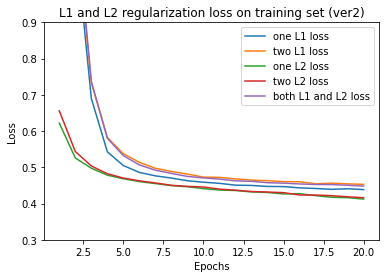

In [ ]:
# L1, L2 regularization effect on training loss


import matplotlib.pyplot as plt

history_dict_h1n1_ver2_L1_1 = history_h1n1_ver2_L1_1.history
history_dict_h1n1_ver2_L1_2 = history_h1n1_ver2_L1_2.history
history_dict_h1n1_ver2_L2_1 = history_h1n1_ver2_L2_1.history
history_dict_h1n1_ver2_L2_2 = history_h1n1_ver2_L2_2.history
history_dict_h1n1_ver2_L12 = history_h1n1_ver2_L12.history

loss_values_h1n1_ver2_L1_1 = history_dict_h1n1_ver2_L1_1["loss"]
loss_values_h1n1_ver2_L1_2 = history_dict_h1n1_ver2_L1_2["loss"]
loss_values_h1n1_ver2_L2_1 = history_dict_h1n1_ver2_L2_1["loss"]
loss_values_h1n1_ver2_L2_2 = history_dict_h1n1_ver2_L2_2["loss"]
loss_values_h1n1_ver2_L12 = history_dict_h1n1_ver2_L12["loss"]


epochs = range(1, len(loss_values_h1n1_ver2_L1_1) + 1)


plt.plot(epochs, loss_values_h1n1_ver2_L1_1, label="one L1 loss")
plt.plot(epochs, loss_values_h1n1_ver2_L1_2, label="two L1 loss")
plt.plot(epochs, loss_values_h1n1_ver2_L2_1, label="one L2 loss")
plt.plot(epochs, loss_values_h1n1_ver2_L2_2, label="two L2 loss")
plt.plot(epochs, loss_values_h1n1_ver2_L12, label="both L1 and L2 loss")


plt.title("L1 and L2 regularization loss on training set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.ylim([0.3,0.9])
plt.legend()
plt.show()

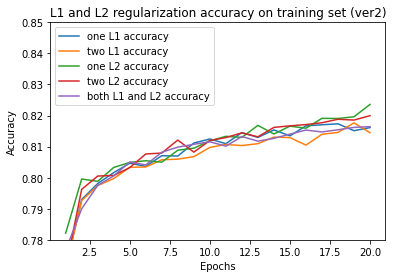

In [ ]:
# L1, L2 regularization effect on training accuracy


import matplotlib.pyplot as plt


acc_values_h1n1_ver2_L1_1 = history_dict_h1n1_ver2_L1_1["accuracy"]
acc_values_h1n1_ver2_L1_2 = history_dict_h1n1_ver2_L1_2["accuracy"]
acc_values_h1n1_ver2_L2_1 = history_dict_h1n1_ver2_L2_1["accuracy"]
acc_values_h1n1_ver2_L2_2 = history_dict_h1n1_ver2_L2_2["accuracy"]
acc_values_h1n1_ver2_L12 = history_dict_h1n1_ver2_L12["accuracy"]

epochs = range(1, len(acc_values_h1n1_ver2_L1_1) + 1)


plt.plot(epochs, acc_values_h1n1_ver2_L1_1, label="one L1 accuracy")
plt.plot(epochs, acc_values_h1n1_ver2_L1_2, label="two L1 accuracy")
plt.plot(epochs, acc_values_h1n1_ver2_L2_1, label="one L2 accuracy")
plt.plot(epochs, acc_values_h1n1_ver2_L2_2, label="two L2 accuracy")
plt.plot(epochs, acc_values_h1n1_ver2_L12, label="both L1 and L2 accuracy")

plt.title("L1 and L2 regularization accuracy on training set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.ylim([0.78, 0.85])
plt.legend()
plt.show()

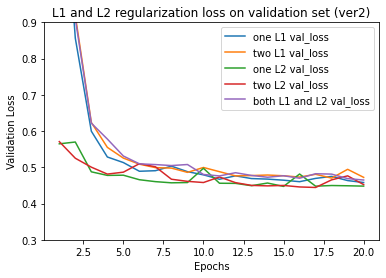

In [ ]:
# L1, L2 regularization effect on validation loss


import matplotlib.pyplot as plt


val_loss_values_h1n1_ver2_L1_1 = history_dict_h1n1_ver2_L1_1["val_loss"]
val_loss_values_h1n1_ver2_L1_2 = history_dict_h1n1_ver2_L1_2["val_loss"]
val_loss_values_h1n1_ver2_L2_1 = history_dict_h1n1_ver2_L2_1["val_loss"]
val_loss_values_h1n1_ver2_L2_2 = history_dict_h1n1_ver2_L2_2["val_loss"]
val_loss_values_h1n1_ver2_L12 = history_dict_h1n1_ver2_L12["val_loss"]


epochs = range(1, len(val_loss_values_h1n1_ver2_L1_1) + 1)


plt.plot(epochs, val_loss_values_h1n1_ver2_L1_1, label="one L1 val_loss")
plt.plot(epochs, val_loss_values_h1n1_ver2_L1_2, label="two L1 val_loss")
plt.plot(epochs, val_loss_values_h1n1_ver2_L2_1, label="one L2 val_loss")
plt.plot(epochs, val_loss_values_h1n1_ver2_L2_2, label="two L2 val_loss")
plt.plot(epochs, val_loss_values_h1n1_ver2_L12, label="both L1 and L2 val_loss")


plt.title("L1 and L2 regularization loss on validation set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.ylim([0.3,0.9])
plt.legend()
plt.show()

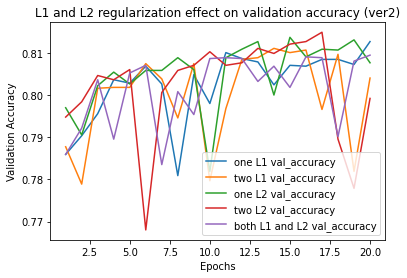

In [ ]:
# L1, L2 regularization effect on validation accuracy


import matplotlib.pyplot as plt


val_acc_values_h1n1_ver2_L1_1 = history_dict_h1n1_ver2_L1_1["val_accuracy"]
val_acc_values_h1n1_ver2_L1_2 = history_dict_h1n1_ver2_L1_2["val_accuracy"]
val_acc_values_h1n1_ver2_L2_1 = history_dict_h1n1_ver2_L2_1["val_accuracy"]
val_acc_values_h1n1_ver2_L2_2 = history_dict_h1n1_ver2_L2_2["val_accuracy"]
val_acc_values_h1n1_ver2_L12 = history_dict_h1n1_ver2_L12["val_accuracy"]



epochs = range(1, len(val_acc_values_h1n1_ver2_L1_1) + 1)


plt.plot(epochs, val_acc_values_h1n1_ver2_L1_1, label="one L1 val_accuracy")
plt.plot(epochs, val_acc_values_h1n1_ver2_L1_2, label="two L1 val_accuracy")
plt.plot(epochs, val_acc_values_h1n1_ver2_L2_1, label="one L2 val_accuracy")
plt.plot(epochs, val_acc_values_h1n1_ver2_L2_2, label="two L2 val_accuracy")
plt.plot(epochs, val_acc_values_h1n1_ver2_L12, label="both L1 and L2 val_accuracy")


plt.title("L1 and L2 regularization effect on validation accuracy (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

## **Hyperparameter effect**

**0.005**

In [ ]:
## 0.005
## loss: 0.4081 - accuracy: 0.8263 - val_loss: 0.4562 - val_accuracy: 0.8125
## loss: 0.4136 - accuracy: 0.8236 - val_loss: 0.4530 - val_accuracy: 0.8107
## loss: 0.4016 - accuracy: 0.8263 - val_loss: 0.4890 - val_accuracy: 0.7708


from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_one = keras.Sequential([
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.005)),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.005)),
                                        layers.Dense(16, activation = "relu"),
                                        layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_one.compile(optimizer = "rmsprop",
                            loss = "binary_crossentropy",
                            metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_one = model_h1n1_ver2_one.fit(x_train_h1n1_ver1,
                                                y_train_h1n1_ver1,
                                                epochs = 20,
                                                batch_size = 512,
                                                validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 1s 11ms/step - loss: 1.1221 - accuracy: 0.7781 - val_loss: 0.9229 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 0s 7ms/step - loss: 0.7417 - accuracy: 0.7914 - val_loss: 0.6507 - val_accuracy: 0.7904
Epoch 3/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5840 - accuracy: 0.7978 - val_loss: 0.5505 - val_accuracy: 0.7954
Epoch 4/20
39/39 [==============================] - 0s 7ms/step - loss: 0.5225 - accuracy: 0.7989 - val_loss: 0.5305 - val_accuracy: 0.8043
Epoch 5/20
39/39 [==============================] - 0s 7ms/step - loss: 0.4918 - accuracy: 0.8025 - val_loss: 0.4953 - val_accuracy: 0.8027
Epoch 6/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4761 - accuracy: 0.8069 - val_loss: 0.4954 - val_accuracy: 0.7819
Epoch 7/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4646 - accuracy: 0.8073 - val_loss: 0.4973 - val_accuracy: 0.7700
Epoch 8/20
39/39 [=

**0.002**

In [ ]:
## 0.002
## loss: 0.4007 - accuracy: 0.8284 - val_loss: 0.4547 - val_accuracy: 0.8119
## loss: 0.4005 - accuracy: 0.8272 - val_loss: 0.4566 - val_accuracy: 0.8067
## loss: 0.4068 - accuracy: 0.8259 - val_loss: 0.4733 - val_accuracy: 0.8087



from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_two = keras.Sequential([
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.002)),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.002)),
                                        layers.Dense(16, activation = "relu"),
                                        layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_two.compile(optimizer = "rmsprop",
                            loss = "binary_crossentropy",
                            metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_two = model_h1n1_ver2_two.fit(x_train_h1n1_ver1,
                                                y_train_h1n1_ver1,
                                                epochs = 20,
                                                batch_size = 512,
                                                validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 1s 11ms/step - loss: 0.7694 - accuracy: 0.7758 - val_loss: 0.6495 - val_accuracy: 0.7861
Epoch 2/20
39/39 [==============================] - 0s 5ms/step - loss: 0.6003 - accuracy: 0.7933 - val_loss: 0.5545 - val_accuracy: 0.8023
Epoch 3/20
39/39 [==============================] - 0s 7ms/step - loss: 0.5253 - accuracy: 0.7997 - val_loss: 0.5239 - val_accuracy: 0.7958
Epoch 4/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4915 - accuracy: 0.8031 - val_loss: 0.4865 - val_accuracy: 0.8043
Epoch 5/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4749 - accuracy: 0.8049 - val_loss: 0.4758 - val_accuracy: 0.8045
Epoch 6/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4636 - accuracy: 0.8069 - val_loss: 0.4838 - val_accuracy: 0.8059
Epoch 7/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4562 - accuracy: 0.8084 - val_loss: 0.4659 - val_accuracy: 0.8103
Epoch 8/20
39/39 [=

**0.001(original)**

In [ ]:
## 0.001
## loss: 0.4076 - accuracy: 0.8232 - val_loss: 0.4590 - val_accuracy: 0.8065
## loss: 0.3939 - accuracy: 0.8296 - val_loss: 0.4674 - val_accuracy: 0.8053
## loss: 0.4100 - accuracy: 0.8231 - val_loss: 0.4600 - val_accuracy: 0.8021



from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_three = keras.Sequential([
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(16, activation = "relu"),
                                          layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_three.compile(optimizer = "rmsprop",
                               loss = "binary_crossentropy",
                               metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_three = model_h1n1_ver2_three.fit(x_train_h1n1_ver1,
                                                     y_train_h1n1_ver1,
                                                     epochs = 20,
                                                     batch_size = 512,
                                                     validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 2s 11ms/step - loss: 0.6513 - accuracy: 0.7731 - val_loss: 0.5969 - val_accuracy: 0.7841
Epoch 2/20
39/39 [==============================] - 0s 5ms/step - loss: 0.5549 - accuracy: 0.7949 - val_loss: 0.5309 - val_accuracy: 0.8014
Epoch 3/20
39/39 [==============================] - 0s 5ms/step - loss: 0.5130 - accuracy: 0.8003 - val_loss: 0.5119 - val_accuracy: 0.8019
Epoch 4/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4911 - accuracy: 0.8005 - val_loss: 0.4901 - val_accuracy: 0.8019
Epoch 5/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4751 - accuracy: 0.8051 - val_loss: 0.4892 - val_accuracy: 0.7988
Epoch 6/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4675 - accuracy: 0.8058 - val_loss: 0.4886 - val_accuracy: 0.8061
Epoch 7/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4597 - accuracy: 0.8096 - val_loss: 0.4927 - val_accuracy: 0.8069
Epoch 8/20
39/39 [=

**0.0005**

In [ ]:
## 0.0005
## loss: 0.4115 - accuracy: 0.8228 - val_loss: 0.4528 - val_accuracy: 0.8065
## loss: 0.4084 - accuracy: 0.8241 - val_loss: 0.4575 - val_accuracy: 0.7992
## loss: 0.4106 - accuracy: 0.8241 - val_loss: 0.4538 - val_accuracy: 0.8117



from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_four = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.0005)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0005)),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_four.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_four = model_h1n1_ver2_four.fit(x_train_h1n1_ver1,
                                                  y_train_h1n1_ver1,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 1s 10ms/step - loss: 0.5841 - accuracy: 0.7739 - val_loss: 0.5286 - val_accuracy: 0.7936
Epoch 2/20
39/39 [==============================] - 0s 5ms/step - loss: 0.5132 - accuracy: 0.7938 - val_loss: 0.4998 - val_accuracy: 0.8008
Epoch 3/20
39/39 [==============================] - 0s 7ms/step - loss: 0.4914 - accuracy: 0.8002 - val_loss: 0.5218 - val_accuracy: 0.7761
Epoch 4/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4756 - accuracy: 0.8034 - val_loss: 0.4939 - val_accuracy: 0.8017
Epoch 5/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4689 - accuracy: 0.8055 - val_loss: 0.4848 - val_accuracy: 0.8049
Epoch 6/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4608 - accuracy: 0.8068 - val_loss: 0.4660 - val_accuracy: 0.8075
Epoch 7/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4561 - accuracy: 0.8088 - val_loss: 0.4660 - val_accuracy: 0.8017
Epoch 8/20
39/39 [=

**0.0001**

In [ ]:
## 0.0001
## loss: 0.4093 - accuracy: 0.8249 - val_loss: 0.4621 - val_accuracy: 0.8113
## loss: 0.4050 - accuracy: 0.8230 - val_loss: 0.4580 - val_accuracy: 0.8095
## loss: 0.4038 - accuracy: 0.8252 - val_loss: 0.4700 - val_accuracy: 0.8067



from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_five = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.0001)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0001)),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_five.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_five = model_h1n1_ver2_five.fit(x_train_h1n1_ver1,
                                                  y_train_h1n1_ver1,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 2s 11ms/step - loss: 0.5211 - accuracy: 0.7857 - val_loss: 0.4978 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4834 - accuracy: 0.7859 - val_loss: 0.4775 - val_accuracy: 0.7859
Epoch 3/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4719 - accuracy: 0.7888 - val_loss: 0.4723 - val_accuracy: 0.8017
Epoch 4/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4636 - accuracy: 0.8022 - val_loss: 0.4671 - val_accuracy: 0.8014
Epoch 5/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4582 - accuracy: 0.8050 - val_loss: 0.4607 - val_accuracy: 0.8065
Epoch 6/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4497 - accuracy: 0.8085 - val_loss: 0.4660 - val_accuracy: 0.8008
Epoch 7/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4493 - accuracy: 0.8081 - val_loss: 0.4569 - val_accuracy: 0.8087
Epoch 8/20
39/39 [=

### visualize

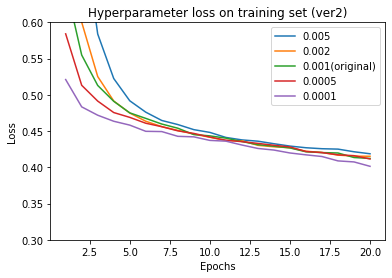

In [ ]:
# Hyperparameter effect on training loss


import matplotlib.pyplot as plt

history_dict_h1n1_ver2_one = history_h1n1_ver2_one.history
history_dict_h1n1_ver2_two = history_h1n1_ver2_two.history
history_dict_h1n1_ver2_three = history_h1n1_ver2_three.history
history_dict_h1n1_ver2_four = history_h1n1_ver2_four.history
history_dict_h1n1_ver2_five = history_h1n1_ver2_five.history

loss_values_h1n1_ver2_one = history_dict_h1n1_ver2_one["loss"]
loss_values_h1n1_ver2_two = history_dict_h1n1_ver2_two["loss"]
loss_values_h1n1_ver2_three = history_dict_h1n1_ver2_three["loss"]
loss_values_h1n1_ver2_four = history_dict_h1n1_ver2_four["loss"]
loss_values_h1n1_ver2_five = history_dict_h1n1_ver2_five["loss"]


epochs = range(1, len(loss_values_h1n1_ver2_one) + 1)


plt.plot(epochs, loss_values_h1n1_ver2_one, label="0.005")
plt.plot(epochs, loss_values_h1n1_ver2_two, label="0.002")
plt.plot(epochs, loss_values_h1n1_ver2_three, label="0.001(original)")
plt.plot(epochs, loss_values_h1n1_ver2_four, label="0.0005")
plt.plot(epochs, loss_values_h1n1_ver2_five, label="0.0001")


plt.title("Hyperparameter loss on training set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.ylim([0.3,0.6])
plt.legend()
plt.show()

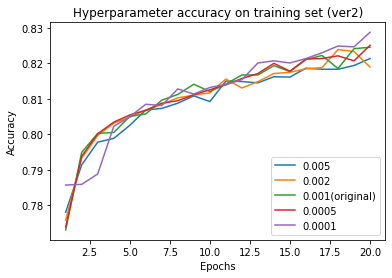

In [ ]:
# Hyperparameter effect on training accuracy


import matplotlib.pyplot as plt


acc_values_h1n1_ver2_one = history_dict_h1n1_ver2_one["accuracy"]
acc_values_h1n1_ver2_two = history_dict_h1n1_ver2_two["accuracy"]
acc_values_h1n1_ver2_three = history_dict_h1n1_ver2_three["accuracy"]
acc_values_h1n1_ver2_four = history_dict_h1n1_ver2_four["accuracy"]
acc_values_h1n1_ver2_five = history_dict_h1n1_ver2_five["accuracy"]

epochs = range(1, len(acc_values_h1n1_ver2_one) + 1)


plt.plot(epochs, acc_values_h1n1_ver2_one, label="0.005")
plt.plot(epochs, acc_values_h1n1_ver2_two, label="0.002")
plt.plot(epochs, acc_values_h1n1_ver2_three, label="0.001(original)")
plt.plot(epochs, acc_values_h1n1_ver2_four, label="0.0005")
plt.plot(epochs, acc_values_h1n1_ver2_five, label="0.0001")

plt.title("Hyperparameter accuracy on training set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.78, 0.85])
plt.legend()
plt.show()

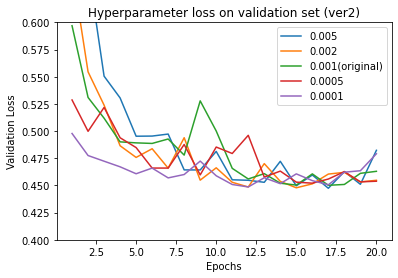

In [ ]:
# Hyperparameter effect on validation loss


import matplotlib.pyplot as plt


val_loss_values_h1n1_ver2_one = history_dict_h1n1_ver2_one["val_loss"]
val_loss_values_h1n1_ver2_two = history_dict_h1n1_ver2_two["val_loss"]
val_loss_values_h1n1_ver2_three = history_dict_h1n1_ver2_three["val_loss"]
val_loss_values_h1n1_ver2_four = history_dict_h1n1_ver2_four["val_loss"]
val_loss_values_h1n1_ver2_five = history_dict_h1n1_ver2_five["val_loss"]


epochs = range(1, len(val_loss_values_h1n1_ver2_one) + 1)


plt.plot(epochs, val_loss_values_h1n1_ver2_one, label="0.005")
plt.plot(epochs, val_loss_values_h1n1_ver2_two, label="0.002")
plt.plot(epochs, val_loss_values_h1n1_ver2_three, label="0.001(original)")
plt.plot(epochs, val_loss_values_h1n1_ver2_four, label="0.0005")
plt.plot(epochs, val_loss_values_h1n1_ver2_five, label="0.0001")


plt.title("Hyperparameter loss on validation set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.ylim([0.4,0.6])
plt.legend()
plt.show()

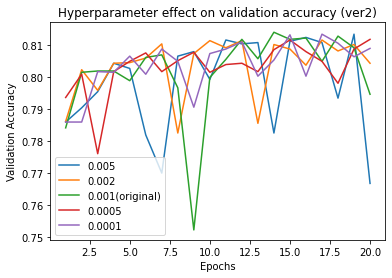

In [ ]:
# Hyperparameter effect on validation accuracy


import matplotlib.pyplot as plt



val_acc_values_h1n1_ver2_one = history_dict_h1n1_ver2_one["val_accuracy"]
val_acc_values_h1n1_ver2_two = history_dict_h1n1_ver2_two["val_accuracy"]
val_acc_values_h1n1_ver2_three = history_dict_h1n1_ver2_three["val_accuracy"]
val_acc_values_h1n1_ver2_four = history_dict_h1n1_ver2_four["val_accuracy"]
val_acc_values_h1n1_ver2_five = history_dict_h1n1_ver2_five["val_accuracy"]



epochs = range(1, len(val_acc_values_h1n1_ver2_one) + 1)


plt.plot(epochs, val_acc_values_h1n1_ver2_one, label="0.005")
plt.plot(epochs, val_acc_values_h1n1_ver2_two, label="0.002")
plt.plot(epochs, val_acc_values_h1n1_ver2_three, label="0.001(original)")
plt.plot(epochs, val_acc_values_h1n1_ver2_four, label="0.0005")
plt.plot(epochs, val_acc_values_h1n1_ver2_five, label="0.0001")


plt.title("Hyperparameter effect on validation accuracy (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

## **Dropout effect**

**# dropout = 1**

In [ ]:
## one dropout
## loss: 0.4186 - accuracy: 0.8195 - val_loss: 0.4526 - val_accuracy: 0.8041
## loss: 0.4119 - accuracy: 0.8216 - val_loss: 0.4562 - val_accuracy: 0.7986
## loss: 0.4155 - accuracy: 0.8216 - val_loss: 0.4561 - val_accuracy: 0.8061


from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_onedr = keras.Sequential([
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dropout(0.5),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(16, activation = "relu"),
                                          layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_onedr.compile(optimizer = "rmsprop",
                              loss = "binary_crossentropy",
                              metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_onedr = model_h1n1_ver2_onedr.fit(x_train_h1n1_ver1,
                                                    y_train_h1n1_ver1,
                                                    epochs = 20,
                                                    batch_size = 512,
                                                    validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 1s 11ms/step - loss: 0.6509 - accuracy: 0.7757 - val_loss: 0.5753 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5504 - accuracy: 0.7860 - val_loss: 0.5355 - val_accuracy: 0.7886
Epoch 3/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5109 - accuracy: 0.7925 - val_loss: 0.4996 - val_accuracy: 0.8045
Epoch 4/20
39/39 [==============================] - 0s 7ms/step - loss: 0.4945 - accuracy: 0.7988 - val_loss: 0.4903 - val_accuracy: 0.8027
Epoch 5/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4785 - accuracy: 0.8042 - val_loss: 0.4756 - val_accuracy: 0.8037
Epoch 6/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4699 - accuracy: 0.8044 - val_loss: 0.4740 - val_accuracy: 0.8021
Epoch 7/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4633 - accuracy: 0.8050 - val_loss: 0.4661 - val_accuracy: 0.8077
Epoch 8/20
39/39 [=

**# dropout = 2**

In [ ]:
## two dropout
## loss: 0.4225 - accuracy: 0.8194 - val_loss: 0.4630 - val_accuracy: 0.8023
## loss: 0.4112 - accuracy: 0.8211 - val_loss: 0.4725 - val_accuracy: 0.7793
## loss: 0.4187 - accuracy: 0.8181 - val_loss: 0.4520 - val_accuracy: 0.8109


from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_twodr = keras.Sequential([
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dropout(0.5),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dropout(0.5),
                                          layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(16, activation = "relu"),
                                          layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_twodr.compile(optimizer = "rmsprop",
                              loss = "binary_crossentropy",
                              metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_twodr = model_h1n1_ver2_twodr.fit(x_train_h1n1_ver1,
                                                    y_train_h1n1_ver1,
                                                    epochs = 20,
                                                    batch_size = 512,
                                                    validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 1s 11ms/step - loss: 0.6688 - accuracy: 0.7693 - val_loss: 0.5787 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5628 - accuracy: 0.7866 - val_loss: 0.5480 - val_accuracy: 0.7859
Epoch 3/20
39/39 [==============================] - 0s 5ms/step - loss: 0.5246 - accuracy: 0.7910 - val_loss: 0.5126 - val_accuracy: 0.8023
Epoch 4/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5028 - accuracy: 0.7958 - val_loss: 0.4934 - val_accuracy: 0.8051
Epoch 5/20
39/39 [==============================] - 0s 7ms/step - loss: 0.4889 - accuracy: 0.7978 - val_loss: 0.4953 - val_accuracy: 0.7982
Epoch 6/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4771 - accuracy: 0.8003 - val_loss: 0.5097 - val_accuracy: 0.7797
Epoch 7/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4716 - accuracy: 0.8009 - val_loss: 0.4777 - val_accuracy: 0.8075
Epoch 8/20
39/39 [=

**# dropout = 3**

In [ ]:
## three dropout
## loss: 0.4308 - accuracy: 0.7859 - val_loss: 0.4954 - val_accuracy: 0.7859
## loss: 0.4264 - accuracy: 0.8120 - val_loss: 0.4659 - val_accuracy: 0.7861
## loss: 0.4252 - accuracy: 0.8103 - val_loss: 0.4626 - val_accuracy: 0.8131


from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_threedr = keras.Sequential([
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dropout(0.5),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dropout(0.5),
                                            layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                            layers.Dropout(0.5),
                                            layers.Dense(16, activation = "relu"),
                                            layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_threedr.compile(optimizer = "rmsprop",
                                loss = "binary_crossentropy",
                                metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_threedr = model_h1n1_ver2_threedr.fit(x_train_h1n1_ver1,
                                                        y_train_h1n1_ver1,
                                                        epochs = 20,
                                                        batch_size = 512,
                                                        validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 1s 10ms/step - loss: 0.6933 - accuracy: 0.7770 - val_loss: 0.6094 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5856 - accuracy: 0.7858 - val_loss: 0.5647 - val_accuracy: 0.7859
Epoch 3/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5405 - accuracy: 0.7860 - val_loss: 0.5275 - val_accuracy: 0.7859
Epoch 4/20
39/39 [==============================] - 0s 7ms/step - loss: 0.5193 - accuracy: 0.7859 - val_loss: 0.5199 - val_accuracy: 0.7859
Epoch 5/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5018 - accuracy: 0.7891 - val_loss: 0.5469 - val_accuracy: 0.7876
Epoch 6/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4855 - accuracy: 0.7934 - val_loss: 0.4798 - val_accuracy: 0.7958
Epoch 7/20
39/39 [==============================] - 0s 7ms/step - loss: 0.4781 - accuracy: 0.7952 - val_loss: 0.5215 - val_accuracy: 0.7996
Epoch 8/20
39/39 [=

### visualize

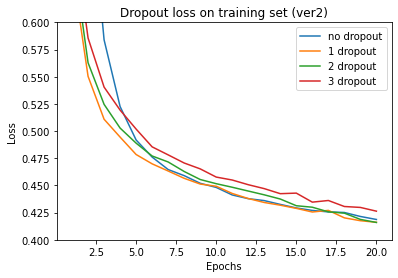

In [ ]:
# Dropout effect on training loss


import matplotlib.pyplot as plt


history_dict_h1n1_ver2_onedr = history_h1n1_ver2_onedr.history
history_dict_h1n1_ver2_twodr = history_h1n1_ver2_twodr.history
history_dict_h1n1_ver2_threedr = history_h1n1_ver2_threedr.history


loss_values_h1n1_ver2_onedr = history_dict_h1n1_ver2_onedr["loss"]
loss_values_h1n1_ver2_twodr = history_dict_h1n1_ver2_twodr["loss"]
loss_values_h1n1_ver2_threedr = history_dict_h1n1_ver2_threedr["loss"]

epochs = range(1, len(loss_values_h1n1_ver2_onedr) + 1)


plt.plot(epochs, loss_values_h1n1_ver2_one, label="no dropout")
plt.plot(epochs, loss_values_h1n1_ver2_onedr, label="1 dropout")
plt.plot(epochs, loss_values_h1n1_ver2_twodr, label="2 dropout")
plt.plot(epochs, loss_values_h1n1_ver2_threedr, label="3 dropout")

plt.title("Dropout loss on training set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.ylim([0.4,0.6])
plt.legend()
plt.show()

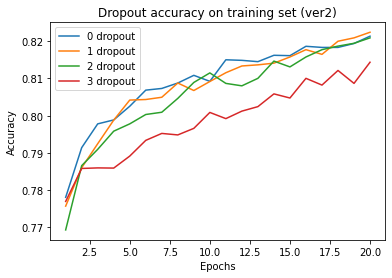

In [ ]:
# Dropout effect on training accuracy


import matplotlib.pyplot as plt


acc_values_h1n1_ver2_onedr = history_dict_h1n1_ver2_onedr["accuracy"]
acc_values_h1n1_ver2_twodr = history_dict_h1n1_ver2_twodr["accuracy"]
acc_values_h1n1_ver2_threedr = history_dict_h1n1_ver2_threedr["accuracy"]

epochs = range(1, len(acc_values_h1n1_ver2_onedr) + 1)


plt.plot(epochs, acc_values_h1n1_ver2_one, label="0 dropout")
plt.plot(epochs, acc_values_h1n1_ver2_onedr, label="1 dropout")
plt.plot(epochs, acc_values_h1n1_ver2_twodr, label="2 dropout")
plt.plot(epochs, acc_values_h1n1_ver2_threedr, label="3 dropout")

plt.title("Dropout accuracy on training set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.78, 0.85])
plt.legend()
plt.show()

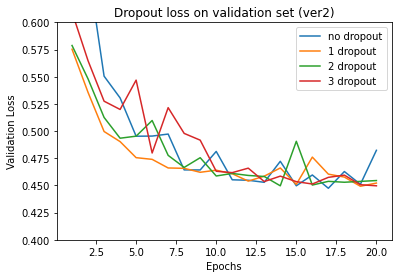

In [ ]:
# Dropout effect on validation loss


import matplotlib.pyplot as plt


val_loss_values_h1n1_ver2_onedr = history_dict_h1n1_ver2_onedr["val_loss"]
val_loss_values_h1n1_ver2_twodr = history_dict_h1n1_ver2_twodr["val_loss"]
val_loss_values_h1n1_ver2_threedr = history_dict_h1n1_ver2_threedr["val_loss"]


epochs = range(1, len(val_loss_values_h1n1_ver2_onedr) + 1)


plt.plot(epochs, val_loss_values_h1n1_ver2_one, label="no dropout")
plt.plot(epochs, val_loss_values_h1n1_ver2_onedr, label="1 dropout")
plt.plot(epochs, val_loss_values_h1n1_ver2_twodr, label="2 dropout")
plt.plot(epochs, val_loss_values_h1n1_ver2_threedr, label="3 dropout")

plt.title("Dropout loss on validation set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.ylim([0.4,0.6])
plt.legend()
plt.show()

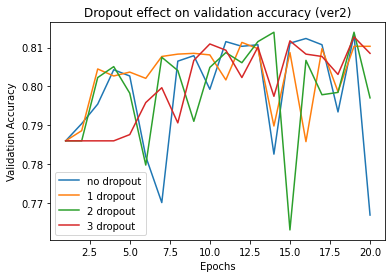

In [ ]:
# Dropout effect on validation accuracy


import matplotlib.pyplot as plt



val_acc_values_h1n1_ver2_onedr = history_dict_h1n1_ver2_onedr["val_accuracy"]
val_acc_values_h1n1_ver2_twodr = history_dict_h1n1_ver2_twodr["val_accuracy"]
val_acc_values_h1n1_ver2_threedr = history_dict_h1n1_ver2_threedr["val_accuracy"]



epochs = range(1, len(val_acc_values_h1n1_ver2_onedr) + 1)


plt.plot(epochs, val_acc_values_h1n1_ver2_one, label="no dropout")
plt.plot(epochs, val_acc_values_h1n1_ver2_onedr, label="1 dropout")
plt.plot(epochs, val_acc_values_h1n1_ver2_twodr, label="2 dropout")
plt.plot(epochs, val_acc_values_h1n1_ver2_threedr, label="3 dropout")


plt.title("Dropout effect on validation accuracy (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

# things to consider

In [ ]:
## [참고]
## 모델 성능을 올리기 위한 방법 중 하나 : 배치 정규화
## 값이 활성화 함수를 통과하기 전에 가중의 변화를 줄이는 것
## https://everyday-deeplearning.tistory.com/entry/%ED%8C%8C%EC%9D%B4%EC%8D%AC%EC%9C%BC%EB%A1%9C-%EB%94%A5%EB%9F%AC%EB%8B%9D%ED%95%98%EA%B8%B0-%EC%8B%A0%EA%B2%BD%EB%A7%9D-%ED%95%99%EC%8A%B5%EC%9D%98-%ED%9A%A8%EC%9C%A8%EA%B3%BC-%EC%A0%95%ED%99%95%EB%8F%84-%EC%98%AC%EB%A6%AC%EA%B8%B0

## layers에서 사용할 수 없는 메소드여서 적용은 못 해봤어요 ㅠㅅㅠ


class BatchNormalization :

  def __init__(self, gamma, beta, momentum = 0.9, running_mean = None, running_var = None) :
    self.gamma = gamma
    self. beta = beta
    self.momentum = momentum
    self.input_shape = None

    # 테스트에서 사용할 평균과 분산
    self.running_mean = running_mean
    self.running_var = running_var

    # backward시 사용할 중간 데이터
    self.batch_size = None
    self.xc = None
    self.std = None
    self.dgamma = None
    self.dbeta = None

    def forward(self, x, train_flg = True) :
      self.input_shape = x.shape
      if x.ndim != 2 :
        N, C, H, W = x.shape
        x = x.reshape(N, -1)

      out = self.__forward(x, train_flg)

      return out.reshape(*self.input_shape)

    def __forward(self, x, train_flg) :
      if self.running_mean is None :
        N, D = x.shape
        self.running_mean = np.zeros(D)
        self.runnng_var = np.zeros(D)

      if train_flg :
        mu = x.mean(axis = 0)
        xc = x - mu
        var = np.mean(xc * 2, axis = 0)
        std = np.sqrt(var + 10e-7)
        xn = xc / std

        self.batch_size = x.shape[0]
        self.xc = xc
        self.xn = xn
        self.std = std
        self.running_mean = self.momentum * self.running_mean + (1 - self.momentum) * mu
        self.running_var = self.momentum * self.running_var + (1 - self.momentum) * var
      else :
        xc = x - self.running_mean
        xn = xc / ((np.sqrt(self.running_var + 10e-7)))

      out = self.gamma * xn + self. beta
      return out

    def backward(self, dout) :
      if dout.ndim != 2 :
        N, C, H, W = dout.shape
        dout = dout.reshape(N,-1)

      dx = self.__backward(dout)
      dx = dx.reshape(*self.input_shape)
      return dx

    def __backward(self, dout) :
      dbeta = dout.sum(axis = 0)
      dgamma = np.sum(self.xn * dout, axis = 0)
      dxn = self.gamma * dout
      dxc = dxn / self.std
      dstd = -np.sum((dxn * self.xc) / (self.std * self.std), axis = 0)
      dvar = 0.5 * dstd / self.std
      dxc += (2.0 / self.batch_size) * self.xc * dvar
      dmu = np.sum(dxc, axis = 0)
      dx = dxc - dmu / self. batch_size

      self.dgamma = dgamma
      self.dbeta = dbeta

      return dx


|number|layer|train loss|train accuracy|validation loss|validation accuracy|
|------|-----|----------|--------------|---------------|-------------------|
|1     |layers.Dense(16, activation = "relu"),</br>layers.Dense(16, activation = "relu"),</br>layers.Dense(1, activation = "sigmoid")|ㅇ|ㅇ|ㅇ|ㅇ|
|2     |layers.Dense(256, activation = "relu"),</br>layers.Dense(128, activation = "relu"),</br>layers.Dense(64, activation = "relu"),</br>layers.Dense(64, activation = "relu"),</br>layers.Dense(16, activation = "relu"),</br>layers.Dense(16, activation = "relu"),</br>layers.Dense(1, activation = "sigmoid")|ㅇ|ㅇ|ㅇ|ㅇ|
|

# seasonal model.ver1

In [101]:
train_seasonal_ver2 = pd.read_csv('/content/drive/MyDrive/22-1_DLAI_Team_Project/train_seasonal_ver2.csv')

In [102]:
print(train_seasonal_ver2.shape)
train_seasonal_ver2.head()

(25026, 36)


,respondent_id,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,chronic_med_condition,child_under_6_months,...,region_3,region_4,region_5,region_6,region_7,region_8,region_9,msa_1,msa_2,msa_3
0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,1,0,1,0,0
1,1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,1,0,1,0
3,3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0,0,1,0,0,0,0,0,0,1
4,4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,1,0,1,0


In [103]:
train_seasonal_ver2.columns

Index(['respondent_id', 'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'chronic_med_condition',
       'child_under_6_months', 'health_worker', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group', 'sex',
       'household_adults', 'household_children', 'seasonal_vaccine', 'race_1',
       'race_2', 'race_3', 'race_4', 'region_0', 'region_1', 'region_2',
       'region_3', 'region_4', 'region_5', 'region_6', 'region_7', 'region_8',
       'region_9', 'msa_1', 'msa_2', 'msa_3'],
      dtype='object')

In [40]:
## split feature and target, train set and validation set

from sklearn.model_selection import train_test_split

feature = train_seasonal_ver2.iloc[:,1:-1]
target = train_seasonal_ver2['seasonal_vaccine']

x_train_seasonal_ver2, x_valid_seasonal_ver2, y_train_seasonal_ver2, y_valid_seasonal_ver2 = train_test_split(feature, target, test_size=0.2,shuffle=True,
                                                                                                              stratify=target,  random_state=1234) 

### layer effect

#### layer 3개

In [73]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_s = keras.Sequential([
                                          layers.Dense(16, activation = "relu"),
                                          layers.Dense(16, activation = "relu"),
                                          layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_s.compile(optimizer = "rmsprop",
                        loss = "binary_crossentropy",
                        metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_s = model_seasonal_ver2_s.fit(x_train_seasonal_ver2,
                                                    y_train_seasonal_ver2,
                                                    epochs = 20,
                                                    batch_size = 512,
                                                    validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 1s 12ms/step - loss: 0.6866 - accuracy: 0.5837 - val_loss: 0.6498 - val_accuracy: 0.6330
Epoch 2/20
40/40 [==============================] - 0s 7ms/step - loss: 0.6243 - accuracy: 0.6770 - val_loss: 0.6051 - val_accuracy: 0.6952
Epoch 3/20
40/40 [==============================] - 0s 6ms/step - loss: 0.5820 - accuracy: 0.7081 - val_loss: 0.5771 - val_accuracy: 0.7109
Epoch 4/20
40/40 [==============================] - 0s 7ms/step - loss: 0.5605 - accuracy: 0.7214 - val_loss: 0.5706 - val_accuracy: 0.7163
Epoch 5/20
40/40 [==============================] - 0s 6ms/step - loss: 0.5512 - accuracy: 0.7268 - val_loss: 0.5592 - val_accuracy: 0.7217
Epoch 6/20
40/40 [==============================] - 0s 7ms/step - loss: 0.5457 - accuracy: 0.7313 - val_loss: 0.5571 - val_accuracy: 0.7215
Epoch 7/20
40/40 [==============================] - 0s 7ms/step - loss: 0.5418 - accuracy: 0.7303 - val_loss: 0.5582 - val_accuracy: 0.7211
Epoch 8/20
40/40 [=

#### layer 8개
- 레이어를 많이 쌓을수록 정확도가 증가함, 모델의 성능이 좋아짐

In [74]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_b = keras.Sequential([
                                      layers.Dense(256, activation = "relu"),
                                      layers.Dense(256, activation = "relu"),
                                      layers.Dense(128, activation = "relu"),
                                      layers.Dense(64, activation = "relu"),
                                      layers.Dense(64, activation = "relu"),
                                      layers.Dense(16, activation = "relu"),
                                      layers.Dense(16, activation = "relu"),
                                      layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_b.compile(optimizer = "rmsprop",
                              loss = "binary_crossentropy",
                              metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_b = model_seasonal_ver2_b.fit(x_train_seasonal_ver2,
                                                    y_train_seasonal_ver2,
                                                    epochs = 20,
                                                    batch_size = 512,
                                                    validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 1s 10ms/step - loss: 0.6141 - accuracy: 0.6653 - val_loss: 0.5655 - val_accuracy: 0.7159
Epoch 2/20
40/40 [==============================] - 0s 6ms/step - loss: 0.5550 - accuracy: 0.7248 - val_loss: 0.6618 - val_accuracy: 0.6878
Epoch 3/20
40/40 [==============================] - 0s 5ms/step - loss: 0.5510 - accuracy: 0.7260 - val_loss: 0.5535 - val_accuracy: 0.7291
Epoch 4/20
40/40 [==============================] - 0s 5ms/step - loss: 0.5407 - accuracy: 0.7334 - val_loss: 0.5737 - val_accuracy: 0.7078
Epoch 5/20
40/40 [==============================] - 0s 6ms/step - loss: 0.5383 - accuracy: 0.7342 - val_loss: 0.5506 - val_accuracy: 0.7271
Epoch 6/20
40/40 [==============================] - 0s 6ms/step - loss: 0.5344 - accuracy: 0.7401 - val_loss: 0.5464 - val_accuracy: 0.7387
Epoch 7/20
40/40 [==============================] - 0s 6ms/step - loss: 0.5292 - accuracy: 0.7422 - val_loss: 0.5784 - val_accuracy: 0.7085
Epoch 8/20
40/40 [=

## **L1, L2 regularization effect**

**layer 8개 + L1 regularization 1개**

In [75]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_L1_1 = keras.Sequential([
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(16, activation = "relu"),
                                             layers.Dense(16, activation = "relu"),
                                             layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_L1_1.compile(optimizer = "rmsprop",
                                 loss = "binary_crossentropy",
                                 metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_L1_1 = model_seasonal_ver2_L1_1.fit(x_train_seasonal_ver2,
                                                          y_train_seasonal_ver2,
                                                          epochs = 20,
                                                          batch_size = 512,
                                                          validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 2s 16ms/step - loss: 1.9690 - accuracy: 0.6521 - val_loss: 1.4873 - val_accuracy: 0.6688
Epoch 2/20
40/40 [==============================] - 0s 9ms/step - loss: 1.1395 - accuracy: 0.7167 - val_loss: 0.9241 - val_accuracy: 0.6898
Epoch 3/20
40/40 [==============================] - 0s 8ms/step - loss: 0.7469 - accuracy: 0.7260 - val_loss: 0.7401 - val_accuracy: 0.6922
Epoch 4/20
40/40 [==============================] - 0s 9ms/step - loss: 0.6433 - accuracy: 0.7262 - val_loss: 0.6308 - val_accuracy: 0.7249
Epoch 5/20
40/40 [==============================] - 0s 9ms/step - loss: 0.6110 - accuracy: 0.7314 - val_loss: 0.6275 - val_accuracy: 0.7175
Epoch 6/20
40/40 [==============================] - 0s 9ms/step - loss: 0.5915 - accuracy: 0.7365 - val_loss: 0.6009 - val_accuracy: 0.7353
Epoch 7/20
40/40 [==============================] - 0s 8ms/step - loss: 0.5838 - accuracy: 0.7365 - val_loss: 0.5848 - val_accuracy: 0.7349
Epoch 8/20
40/40 [=

**layer 8개 + L1 regularization 2개**

In [76]:
## loss: 0.4524 - accuracy: 0.8157 - val_loss: 0.4727 - val_accuracy: 0.8073
## loss: 0.4516 - accuracy: 0.8180 - val_loss: 0.4774 - val_accuracy: 0.8083
## loss: 0.4530 - accuracy: 0.8145 - val_loss: 0.4723 - val_accuracy: 0.8041



from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_L1_2 = keras.Sequential([
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                             layers.Dense(16, activation = "relu"),
                                             layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_L1_2.compile(optimizer = "rmsprop",
                                 loss = "binary_crossentropy",
                                 metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_L1_2 = model_seasonal_ver2_L1_2.fit(x_train_seasonal_ver2,
                                                          y_train_seasonal_ver2,
                                                          epochs = 20,
                                                          batch_size = 512,
                                                          validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 2s 16ms/step - loss: 2.0993 - accuracy: 0.6641 - val_loss: 1.5766 - val_accuracy: 0.7078
Epoch 2/20
40/40 [==============================] - 0s 6ms/step - loss: 1.2594 - accuracy: 0.7190 - val_loss: 0.9836 - val_accuracy: 0.7219
Epoch 3/20
40/40 [==============================] - 0s 6ms/step - loss: 0.8338 - accuracy: 0.7248 - val_loss: 0.7490 - val_accuracy: 0.7249
Epoch 4/20
40/40 [==============================] - 0s 7ms/step - loss: 0.6980 - accuracy: 0.7272 - val_loss: 0.6862 - val_accuracy: 0.7249
Epoch 5/20
40/40 [==============================] - 0s 7ms/step - loss: 0.6472 - accuracy: 0.7356 - val_loss: 0.7272 - val_accuracy: 0.6762
Epoch 6/20
40/40 [==============================] - 0s 6ms/step - loss: 0.6219 - accuracy: 0.7354 - val_loss: 0.6328 - val_accuracy: 0.7257
Epoch 7/20
40/40 [==============================] - 0s 6ms/step - loss: 0.6035 - accuracy: 0.7385 - val_loss: 0.6200 - val_accuracy: 0.7307
Epoch 8/20
40/40 [=

**layer 8개 + L2 regularization 1개**

In [77]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_L2_1 = keras.Sequential([
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(16, activation = "relu"),
                                             layers.Dense(16, activation = "relu"),
                                             layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_L2_1.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_L2_1 = model_seasonal_ver2_L2_1.fit(x_train_seasonal_ver2,
                                                          y_train_seasonal_ver2,
                                                          epochs = 20,
                                                          batch_size = 512,
                                                          validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 2s 16ms/step - loss: 0.7313 - accuracy: 0.6726 - val_loss: 0.7336 - val_accuracy: 0.6822
Epoch 2/20
40/40 [==============================] - 0s 8ms/step - loss: 0.6256 - accuracy: 0.7205 - val_loss: 0.6928 - val_accuracy: 0.6892
Epoch 3/20
40/40 [==============================] - 0s 8ms/step - loss: 0.5896 - accuracy: 0.7265 - val_loss: 0.6122 - val_accuracy: 0.6948
Epoch 4/20
40/40 [==============================] - 0s 6ms/step - loss: 0.5721 - accuracy: 0.7307 - val_loss: 0.6045 - val_accuracy: 0.7078
Epoch 5/20
40/40 [==============================] - 0s 7ms/step - loss: 0.5598 - accuracy: 0.7326 - val_loss: 0.5745 - val_accuracy: 0.7297
Epoch 6/20
40/40 [==============================] - 0s 8ms/step - loss: 0.5503 - accuracy: 0.7393 - val_loss: 0.5622 - val_accuracy: 0.7331
Epoch 7/20
40/40 [==============================] - 0s 7ms/step - loss: 0.5437 - accuracy: 0.7396 - val_loss: 0.5526 - val_accuracy: 0.7385
Epoch 8/20
40/40 [=

**layer 8개 + L2 regularization 2개**

In [78]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_L2_2 = keras.Sequential([
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                             layers.Dense(16, activation = "relu"),
                                             layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_L2_2.compile(optimizer = "rmsprop",
                                 loss = "binary_crossentropy",
                                 metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_L2_2 = model_seasonal_ver2_L2_2.fit(x_train_seasonal_ver2,
                                                          y_train_seasonal_ver2,
                                                          epochs = 20,
                                                          batch_size = 512,
                                                          validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 2s 15ms/step - loss: 0.7754 - accuracy: 0.6371 - val_loss: 0.6730 - val_accuracy: 0.7163
Epoch 2/20
40/40 [==============================] - 0s 9ms/step - loss: 0.6429 - accuracy: 0.7145 - val_loss: 0.6412 - val_accuracy: 0.6898
Epoch 3/20
40/40 [==============================] - 0s 9ms/step - loss: 0.6038 - accuracy: 0.7239 - val_loss: 0.6385 - val_accuracy: 0.6696
Epoch 4/20
40/40 [==============================] - 0s 9ms/step - loss: 0.5836 - accuracy: 0.7267 - val_loss: 0.6080 - val_accuracy: 0.7097
Epoch 5/20
40/40 [==============================] - 0s 9ms/step - loss: 0.5685 - accuracy: 0.7335 - val_loss: 0.6128 - val_accuracy: 0.6870
Epoch 6/20
40/40 [==============================] - 0s 8ms/step - loss: 0.5590 - accuracy: 0.7343 - val_loss: 0.6215 - val_accuracy: 0.6742
Epoch 7/20
40/40 [==============================] - 1s 14ms/step - loss: 0.5515 - accuracy: 0.7368 - val_loss: 0.5765 - val_accuracy: 0.7313
Epoch 8/20
40/40 [

**layer 8개 + L1&L2 regularization 1개**

In [79]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_L12 = keras.Sequential([
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001)),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001)),
                                            layers.Dense(16, activation = "relu"),
                                            layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_L12.compile(optimizer = "rmsprop",
                                loss = "binary_crossentropy",
                                metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_L12 = model_seasonal_ver2_L12.fit(x_train_seasonal_ver2,
                                                        y_train_seasonal_ver2,
                                                        epochs = 20,
                                                        batch_size = 512,
                                                        validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 2s 18ms/step - loss: 2.2615 - accuracy: 0.6469 - val_loss: 1.6722 - val_accuracy: 0.7101
Epoch 2/20
40/40 [==============================] - 0s 9ms/step - loss: 1.3358 - accuracy: 0.7149 - val_loss: 1.0517 - val_accuracy: 0.7038
Epoch 3/20
40/40 [==============================] - 0s 9ms/step - loss: 0.8742 - accuracy: 0.7221 - val_loss: 0.7827 - val_accuracy: 0.7113
Epoch 4/20
40/40 [==============================] - 0s 8ms/step - loss: 0.7176 - accuracy: 0.7293 - val_loss: 0.6862 - val_accuracy: 0.7249
Epoch 5/20
40/40 [==============================] - 0s 9ms/step - loss: 0.6620 - accuracy: 0.7287 - val_loss: 0.6840 - val_accuracy: 0.6980
Epoch 6/20
40/40 [==============================] - 1s 13ms/step - loss: 0.6271 - accuracy: 0.7336 - val_loss: 0.6243 - val_accuracy: 0.7349
Epoch 7/20
40/40 [==============================] - 0s 12ms/step - loss: 0.6058 - accuracy: 0.7368 - val_loss: 0.6381 - val_accuracy: 0.7028
Epoch 8/20
40/40 

### visualize

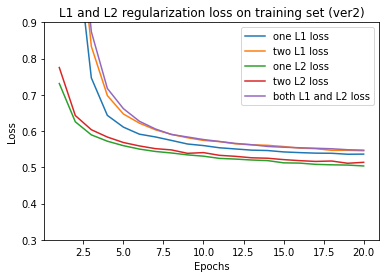

In [80]:
# L1, L2 regularization effect on training loss


import matplotlib.pyplot as plt

history_dict_seasonal_ver2_L1_1 = history_seasonal_ver2_L1_1.history
history_dict_seasonal_ver2_L1_2 = history_seasonal_ver2_L1_2.history
history_dict_seasonal_ver2_L2_1 = history_seasonal_ver2_L2_1.history
history_dict_seasonal_ver2_L2_2 = history_seasonal_ver2_L2_2.history
history_dict_seasonal_ver2_L12 = history_seasonal_ver2_L12.history

loss_values_seasonal_ver2_L1_1 = history_dict_seasonal_ver2_L1_1["loss"]
loss_values_seasonal_ver2_L1_2 = history_dict_seasonal_ver2_L1_2["loss"]
loss_values_seasonal_ver2_L2_1 = history_dict_seasonal_ver2_L2_1["loss"]
loss_values_seasonal_ver2_L2_2 = history_dict_seasonal_ver2_L2_2["loss"]
loss_values_seasonal_ver2_L12 = history_dict_seasonal_ver2_L12["loss"]


epochs = range(1, len(loss_values_seasonal_ver2_L1_1) + 1)


plt.plot(epochs, loss_values_seasonal_ver2_L1_1, label="one L1 loss")
plt.plot(epochs, loss_values_seasonal_ver2_L1_2, label="two L1 loss")
plt.plot(epochs, loss_values_seasonal_ver2_L2_1, label="one L2 loss")
plt.plot(epochs, loss_values_seasonal_ver2_L2_2, label="two L2 loss")
plt.plot(epochs, loss_values_seasonal_ver2_L12, label="both L1 and L2 loss")


plt.title("L1 and L2 regularization loss on training set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.ylim([0.3,0.9])
plt.legend()
plt.show()

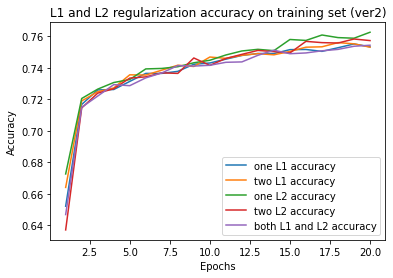

In [81]:
# L1, L2 regularization effect on training accuracy


import matplotlib.pyplot as plt


acc_values_seasonal_ver2_L1_1 = history_dict_seasonal_ver2_L1_1["accuracy"]
acc_values_seasonal_ver2_L1_2 = history_dict_seasonal_ver2_L1_2["accuracy"]
acc_values_seasonal_ver2_L2_1 = history_dict_seasonal_ver2_L2_1["accuracy"]
acc_values_seasonal_ver2_L2_2 = history_dict_seasonal_ver2_L2_2["accuracy"]
acc_values_seasonal_ver2_L12 = history_dict_seasonal_ver2_L12["accuracy"]


epochs = range(1, len(acc_values_seasonal_ver2_L1_1) + 1)


plt.plot(epochs, acc_values_seasonal_ver2_L1_1, label="one L1 accuracy")
plt.plot(epochs, acc_values_seasonal_ver2_L1_2, label="two L1 accuracy")
plt.plot(epochs, acc_values_seasonal_ver2_L2_1, label="one L2 accuracy")
plt.plot(epochs, acc_values_seasonal_ver2_L2_2, label="two L2 accuracy")
plt.plot(epochs, acc_values_seasonal_ver2_L12, label="both L1 and L2 accuracy")


plt.title("L1 and L2 regularization accuracy on training set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

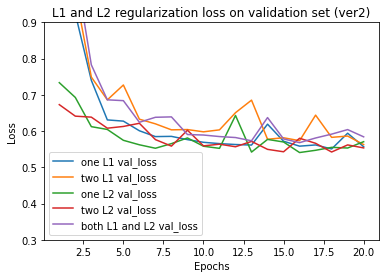

In [82]:
# L1, L2 regularization effect on validation loss


import matplotlib.pyplot as plt


val_loss_values_seasonal_ver2_L1_1 = history_dict_seasonal_ver2_L1_1["val_loss"]
val_loss_values_seasonal_ver2_L1_2 = history_dict_seasonal_ver2_L1_2["val_loss"]
val_loss_values_seasonal_ver2_L2_1 = history_dict_seasonal_ver2_L2_1["val_loss"]
val_loss_values_seasonal_ver2_L2_2 = history_dict_seasonal_ver2_L2_2["val_loss"]
val_loss_values_seasonal_ver2_L12 = history_dict_seasonal_ver2_L12["val_loss"]


epochs = range(1, len(val_loss_values_seasonal_ver2_L1_1) + 1)


plt.plot(epochs, val_loss_values_seasonal_ver2_L1_1, label="one L1 val_loss")
plt.plot(epochs, val_loss_values_seasonal_ver2_L1_2, label="two L1 val_loss")
plt.plot(epochs, val_loss_values_seasonal_ver2_L2_1, label="one L2 val_loss")
plt.plot(epochs, val_loss_values_seasonal_ver2_L2_2, label="two L2 val_loss")
plt.plot(epochs, val_loss_values_seasonal_ver2_L12, label="both L1 and L2 val_loss")


plt.title("L1 and L2 regularization loss on validation set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.ylim([0.3,0.9])
plt.legend()
plt.show()

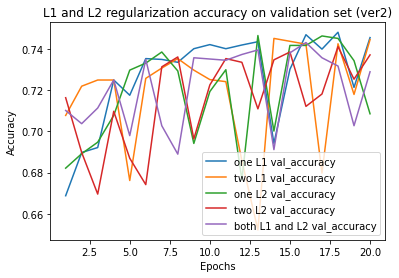

In [83]:
# L1, L2 regularization effect on validation accuracy


import matplotlib.pyplot as plt


val_acc_values_seasonal_ver2_L1_1 = history_dict_seasonal_ver2_L1_1["val_accuracy"]
val_acc_values_seasonal_ver2_L1_2 = history_dict_seasonal_ver2_L1_2["val_accuracy"]
val_acc_values_seasonal_ver2_L2_1 = history_dict_seasonal_ver2_L2_1["val_accuracy"]
val_acc_values_seasonal_ver2_L2_2 = history_dict_seasonal_ver2_L2_2["val_accuracy"]
val_acc_values_seasonal_ver2_L12 = history_dict_seasonal_ver2_L12["val_accuracy"]


epochs = range(1, len(val_acc_values_seasonal_ver2_L1_1) + 1)


plt.plot(epochs, val_acc_values_seasonal_ver2_L1_1, label="one L1 val_accuracy")
plt.plot(epochs, val_acc_values_seasonal_ver2_L1_2, label="two L1 val_accuracy")
plt.plot(epochs, val_acc_values_seasonal_ver2_L2_1, label="one L2 val_accuracy")
plt.plot(epochs, val_acc_values_seasonal_ver2_L2_2, label="two L2 val_accuracy")
plt.plot(epochs, val_acc_values_seasonal_ver2_L12, label="both L1 and L2 val_accuracy")


plt.title("L1 and L2 regularization accuracy on validation set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

## **Hyperparameter effect**

**0.005**

In [84]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_one = keras.Sequential([
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.005)),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.005)),
                                            layers.Dense(16, activation = "relu"),
                                            layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_one.compile(optimizer = "rmsprop",
                                loss = "binary_crossentropy",
                                metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_one = model_seasonal_ver2_one.fit(x_train_seasonal_ver2,
                                                        y_train_seasonal_ver2,
                                                        epochs = 20,
                                                        batch_size = 512,
                                                        validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 3s 16ms/step - loss: 1.2205 - accuracy: 0.6714 - val_loss: 0.9541 - val_accuracy: 0.7123
Epoch 2/20
40/40 [==============================] - 0s 9ms/step - loss: 0.8365 - accuracy: 0.7181 - val_loss: 0.7455 - val_accuracy: 0.7103
Epoch 3/20
40/40 [==============================] - 0s 6ms/step - loss: 0.6792 - accuracy: 0.7295 - val_loss: 0.7313 - val_accuracy: 0.6378
Epoch 4/20
40/40 [==============================] - 0s 6ms/step - loss: 0.6140 - accuracy: 0.7287 - val_loss: 0.6104 - val_accuracy: 0.7235
Epoch 5/20
40/40 [==============================] - 0s 6ms/step - loss: 0.5819 - accuracy: 0.7344 - val_loss: 0.5875 - val_accuracy: 0.7259
Epoch 6/20
40/40 [==============================] - 0s 8ms/step - loss: 0.5659 - accuracy: 0.7359 - val_loss: 0.6339 - val_accuracy: 0.6688
Epoch 7/20
40/40 [==============================] - 0s 8ms/step - loss: 0.5572 - accuracy: 0.7376 - val_loss: 0.6557 - val_accuracy: 0.6972
Epoch 8/20
40/40 [=

**0.002**

In [85]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_two = keras.Sequential([
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.002)),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.002)),
                                            layers.Dense(16, activation = "relu"),
                                            layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_two.compile(optimizer = "rmsprop",
                                loss = "binary_crossentropy",
                                metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_two = model_seasonal_ver2_two.fit(x_train_seasonal_ver2,
                                                        y_train_seasonal_ver2,
                                                        epochs = 20,
                                                        batch_size = 512,
                                                        validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 2s 16ms/step - loss: 0.8698 - accuracy: 0.6726 - val_loss: 0.7680 - val_accuracy: 0.7038
Epoch 2/20
40/40 [==============================] - 0s 8ms/step - loss: 0.6978 - accuracy: 0.7200 - val_loss: 0.6620 - val_accuracy: 0.7066
Epoch 3/20
40/40 [==============================] - 0s 9ms/step - loss: 0.6231 - accuracy: 0.7290 - val_loss: 0.6487 - val_accuracy: 0.6912
Epoch 4/20
40/40 [==============================] - 0s 9ms/step - loss: 0.5967 - accuracy: 0.7291 - val_loss: 0.6044 - val_accuracy: 0.7313
Epoch 5/20
40/40 [==============================] - 0s 7ms/step - loss: 0.5753 - accuracy: 0.7340 - val_loss: 0.5903 - val_accuracy: 0.7203
Epoch 6/20
40/40 [==============================] - 0s 7ms/step - loss: 0.5614 - accuracy: 0.7386 - val_loss: 0.6535 - val_accuracy: 0.6508
Epoch 7/20
40/40 [==============================] - 0s 9ms/step - loss: 0.5565 - accuracy: 0.7351 - val_loss: 0.5696 - val_accuracy: 0.7365
Epoch 8/20
40/40 [=

**0.001(original)**

In [86]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_three = keras.Sequential([
                                              layers.Dense(256, activation = "relu"),
                                              layers.Dense(256, activation = "relu"),
                                              layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                              layers.Dense(64, activation = "relu"),
                                              layers.Dense(64, activation = "relu"),
                                              layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                              layers.Dense(16, activation = "relu"),
                                              layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_three.compile(optimizer = "rmsprop",
                                  loss = "binary_crossentropy",
                                  metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_three = model_seasonal_ver2_three.fit(x_train_seasonal_ver2,
                                                            y_train_seasonal_ver2,
                                                            epochs = 20,
                                                            batch_size = 512,
                                                            validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 2s 15ms/step - loss: 0.7464 - accuracy: 0.6688 - val_loss: 0.6797 - val_accuracy: 0.7078
Epoch 2/20
40/40 [==============================] - 0s 9ms/step - loss: 0.6385 - accuracy: 0.7191 - val_loss: 0.6801 - val_accuracy: 0.6734
Epoch 3/20
40/40 [==============================] - 0s 11ms/step - loss: 0.6023 - accuracy: 0.7255 - val_loss: 0.6191 - val_accuracy: 0.6976
Epoch 4/20
40/40 [==============================] - 1s 13ms/step - loss: 0.5797 - accuracy: 0.7298 - val_loss: 0.5909 - val_accuracy: 0.7271
Epoch 5/20
40/40 [==============================] - 0s 12ms/step - loss: 0.5646 - accuracy: 0.7331 - val_loss: 0.5921 - val_accuracy: 0.7233
Epoch 6/20
40/40 [==============================] - 0s 9ms/step - loss: 0.5561 - accuracy: 0.7364 - val_loss: 0.5765 - val_accuracy: 0.7163
Epoch 7/20
40/40 [==============================] - 0s 10ms/step - loss: 0.5495 - accuracy: 0.7397 - val_loss: 0.5566 - val_accuracy: 0.7351
Epoch 8/20
40/4

**0.0005**

In [87]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_four = keras.Sequential([
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.0005)),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0005)),
                                            layers.Dense(16, activation = "relu"),
                                            layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_four.compile(optimizer = "rmsprop",
                                 loss = "binary_crossentropy",
                                 metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_four = model_seasonal_ver2_four.fit(x_train_seasonal_ver2,
                                                          y_train_seasonal_ver2,
                                                          epochs = 20,
                                                          batch_size = 512,
                                                          validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 2s 16ms/step - loss: 0.7053 - accuracy: 0.6357 - val_loss: 0.7328 - val_accuracy: 0.6324
Epoch 2/20
40/40 [==============================] - 0s 9ms/step - loss: 0.6076 - accuracy: 0.7184 - val_loss: 0.6021 - val_accuracy: 0.7084
Epoch 3/20
40/40 [==============================] - 0s 8ms/step - loss: 0.5838 - accuracy: 0.7216 - val_loss: 0.5876 - val_accuracy: 0.7219
Epoch 4/20
40/40 [==============================] - 0s 6ms/step - loss: 0.5696 - accuracy: 0.7272 - val_loss: 0.5844 - val_accuracy: 0.7171
Epoch 5/20
40/40 [==============================] - 0s 9ms/step - loss: 0.5620 - accuracy: 0.7334 - val_loss: 0.6679 - val_accuracy: 0.6566
Epoch 6/20
40/40 [==============================] - 0s 7ms/step - loss: 0.5554 - accuracy: 0.7334 - val_loss: 0.5695 - val_accuracy: 0.7227
Epoch 7/20
40/40 [==============================] - 0s 10ms/step - loss: 0.5493 - accuracy: 0.7375 - val_loss: 0.5554 - val_accuracy: 0.7319
Epoch 8/20
40/40 [

**0.0001**

In [88]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_five = keras.Sequential([
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.0001)),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0001)),
                                            layers.Dense(16, activation = "relu"),
                                            layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_five.compile(optimizer = "rmsprop",
                                 loss = "binary_crossentropy",
                                 metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_five = model_seasonal_ver2_five.fit(x_train_seasonal_ver2,
                                                          y_train_seasonal_ver2,
                                                          epochs = 20,
                                                          batch_size = 512,
                                                          validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 2s 16ms/step - loss: 0.6344 - accuracy: 0.6670 - val_loss: 0.5811 - val_accuracy: 0.7109
Epoch 2/20
40/40 [==============================] - 0s 10ms/step - loss: 0.5755 - accuracy: 0.7144 - val_loss: 0.5888 - val_accuracy: 0.7129
Epoch 3/20
40/40 [==============================] - 0s 9ms/step - loss: 0.5621 - accuracy: 0.7232 - val_loss: 0.5824 - val_accuracy: 0.7080
Epoch 4/20
40/40 [==============================] - 0s 9ms/step - loss: 0.5521 - accuracy: 0.7309 - val_loss: 0.6776 - val_accuracy: 0.6716
Epoch 5/20
40/40 [==============================] - 0s 8ms/step - loss: 0.5504 - accuracy: 0.7312 - val_loss: 0.5522 - val_accuracy: 0.7321
Epoch 6/20
40/40 [==============================] - 0s 8ms/step - loss: 0.5432 - accuracy: 0.7388 - val_loss: 0.5722 - val_accuracy: 0.7129
Epoch 7/20
40/40 [==============================] - 0s 10ms/step - loss: 0.5399 - accuracy: 0.7393 - val_loss: 0.5651 - val_accuracy: 0.7163
Epoch 8/20
40/40 

### visualize

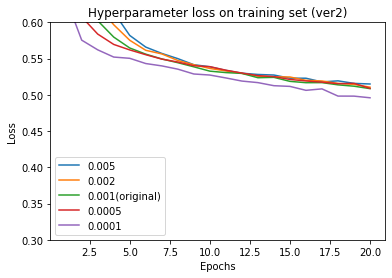

In [91]:
# Hyperparameter effect on training loss


import matplotlib.pyplot as plt

history_dict_seasonal_ver2_one = history_seasonal_ver2_one.history
history_dict_seasonal_ver2_two = history_seasonal_ver2_two.history
history_dict_seasonal_ver2_three = history_seasonal_ver2_three.history
history_dict_seasonal_ver2_four = history_seasonal_ver2_four.history
history_dict_seasonal_ver2_five = history_seasonal_ver2_five.history

loss_values_seasonal_ver2_one = history_dict_seasonal_ver2_one["loss"]
loss_values_seasonal_ver2_two = history_dict_seasonal_ver2_two["loss"]
loss_values_seasonal_ver2_three = history_dict_seasonal_ver2_three["loss"]
loss_values_seasonal_ver2_four = history_dict_seasonal_ver2_four["loss"]
loss_values_seasonal_ver2_five = history_dict_seasonal_ver2_five["loss"]


epochs = range(1, len(loss_values_seasonal_ver2_one) + 1)


plt.plot(epochs, loss_values_seasonal_ver2_one, label="0.005")
plt.plot(epochs, loss_values_seasonal_ver2_two, label="0.002")
plt.plot(epochs, loss_values_seasonal_ver2_three, label="0.001(original)")
plt.plot(epochs, loss_values_seasonal_ver2_four, label="0.0005")
plt.plot(epochs, loss_values_seasonal_ver2_five, label="0.0001")


plt.title("Hyperparameter loss on training set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.ylim([0.3,0.6])
plt.legend()
plt.show()

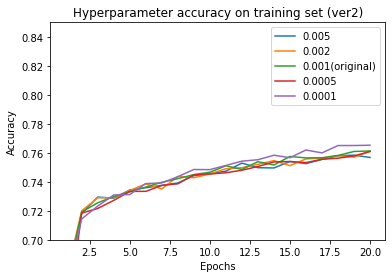

In [95]:
# Hyperparameter effect on training accuracy


import matplotlib.pyplot as plt


acc_values_seasonal_ver2_one = history_dict_seasonal_ver2_one["accuracy"]
acc_values_seasonal_ver2_two = history_dict_seasonal_ver2_two["accuracy"]
acc_values_seasonal_ver2_three = history_dict_seasonal_ver2_three["accuracy"]
acc_values_seasonal_ver2_four = history_dict_seasonal_ver2_four["accuracy"]
acc_values_seasonal_ver2_five = history_dict_seasonal_ver2_five["accuracy"]


epochs = range(1, len(acc_values_seasonal_ver2_one) + 1)


plt.plot(epochs, acc_values_seasonal_ver2_one, label="0.005")
plt.plot(epochs, acc_values_seasonal_ver2_two, label="0.002")
plt.plot(epochs, acc_values_seasonal_ver2_three, label="0.001(original)")
plt.plot(epochs, acc_values_seasonal_ver2_four, label="0.0005")
plt.plot(epochs, acc_values_seasonal_ver2_five, label="0.0001")


plt.title("Hyperparameter accuracy on training set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.ylim([0.7, 0.85])
plt.legend()
plt.show()

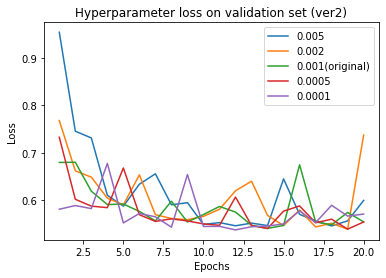

In [97]:
# Hyperparameter effect on validation loss


import matplotlib.pyplot as plt


val_loss_values_seasonal_ver2_one = history_dict_seasonal_ver2_one["val_loss"]
val_loss_values_seasonal_ver2_two = history_dict_seasonal_ver2_two["val_loss"]
val_loss_values_seasonal_ver2_three = history_dict_seasonal_ver2_three["val_loss"]
val_loss_values_seasonal_ver2_four = history_dict_seasonal_ver2_four["val_loss"]
val_loss_values_seasonal_ver2_five = history_dict_seasonal_ver2_five["val_loss"]


epochs = range(1, len(val_loss_values_seasonal_ver2_one) + 1)


plt.plot(epochs, val_loss_values_seasonal_ver2_one, label="0.005")
plt.plot(epochs, val_loss_values_seasonal_ver2_two, label="0.002")
plt.plot(epochs, val_loss_values_seasonal_ver2_three, label="0.001(original)")
plt.plot(epochs, val_loss_values_seasonal_ver2_four, label="0.0005")
plt.plot(epochs, val_loss_values_seasonal_ver2_five, label="0.0001")


plt.title("Hyperparameter loss on validation set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

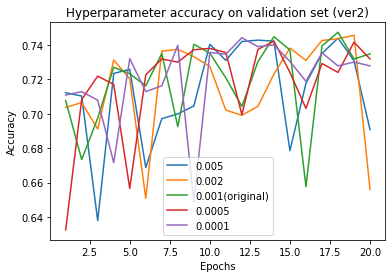

In [98]:
# Hyperparameter effect on validation accuracy

import matplotlib.pyplot as plt


val_acc_values_seasonal_ver2_one = history_dict_seasonal_ver2_one["val_accuracy"]
val_acc_values_seasonal_ver2_two = history_dict_seasonal_ver2_two["val_accuracy"]
val_acc_values_seasonal_ver2_three = history_dict_seasonal_ver2_three["val_accuracy"]
val_acc_values_seasonal_ver2_four = history_dict_seasonal_ver2_four["val_accuracy"]
val_acc_values_seasonal_ver2_five = history_dict_seasonal_ver2_five["val_accuracy"]


epochs = range(1, len(val_acc_values_seasonal_ver2_one) + 1)


plt.plot(epochs, val_acc_values_seasonal_ver2_one, label="0.005")
plt.plot(epochs, val_acc_values_seasonal_ver2_two, label="0.002")
plt.plot(epochs, val_acc_values_seasonal_ver2_three, label="0.001(original)")
plt.plot(epochs, val_acc_values_seasonal_ver2_four, label="0.0005")
plt.plot(epochs, val_acc_values_seasonal_ver2_five, label="0.0001")


plt.title("Hyperparameter accuracy on validation set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## **Dropout effect**

**# dropout = 1**

In [61]:
## one dropout
## loss: 0.4186 - accuracy: 0.8195 - val_loss: 0.4526 - val_accuracy: 0.8041
## loss: 0.4119 - accuracy: 0.8216 - val_loss: 0.4562 - val_accuracy: 0.7986
## loss: 0.4155 - accuracy: 0.8216 - val_loss: 0.4561 - val_accuracy: 0.8061


from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_onedr = keras.Sequential([
                                              layers.Dense(256, activation = "relu"),
                                              layers.Dense(256, activation = "relu"),
                                              layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                              layers.Dense(64, activation = "relu"),
                                              layers.Dropout(0.5),
                                              layers.Dense(64, activation = "relu"),
                                              layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                              layers.Dense(16, activation = "relu"),
                                              layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_onedr.compile(optimizer = "rmsprop",
                                  loss = "binary_crossentropy",
                                  metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_onedr = model_seasonal_ver2_onedr.fit(x_train_seasonal_ver2,
                                                            y_train_seasonal_ver2,
                                                            epochs = 20,
                                                            batch_size = 512,
                                                            validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
39/39 [==============================] - 1s 10ms/step - loss: 0.6543 - accuracy: 0.7815 - val_loss: 0.5754 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5558 - accuracy: 0.7864 - val_loss: 0.5301 - val_accuracy: 0.7859
Epoch 3/20
39/39 [==============================] - 0s 7ms/step - loss: 0.5170 - accuracy: 0.7917 - val_loss: 0.5081 - val_accuracy: 0.8035
Epoch 4/20
39/39 [==============================] - 0s 7ms/step - loss: 0.4919 - accuracy: 0.8018 - val_loss: 0.4957 - val_accuracy: 0.8067
Epoch 5/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4789 - accuracy: 0.8030 - val_loss: 0.4772 - val_accuracy: 0.8055
Epoch 6/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4693 - accuracy: 0.8025 - val_loss: 0.4703 - val_accuracy: 0.8079
Epoch 7/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4595 - accuracy: 0.8087 - val_loss: 0.4721 - val_accuracy: 0.8039
Epoch 8/20
39/39 [=

**# dropout = 2**

In [62]:
## two dropout
## loss: 0.4225 - accuracy: 0.8194 - val_loss: 0.4630 - val_accuracy: 0.8023
## loss: 0.4112 - accuracy: 0.8211 - val_loss: 0.4725 - val_accuracy: 0.7793
## loss: 0.4187 - accuracy: 0.8181 - val_loss: 0.4520 - val_accuracy: 0.8109


from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_twodr = keras.Sequential([
                                              layers.Dense(256, activation = "relu"),
                                              layers.Dense(256, activation = "relu"),
                                              layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                              layers.Dense(64, activation = "relu"),
                                              layers.Dropout(0.5),
                                              layers.Dense(64, activation = "relu"),
                                              layers.Dropout(0.5),
                                              layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                              layers.Dense(16, activation = "relu"),
                                              layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_twodr.compile(optimizer = "rmsprop",
                                  loss = "binary_crossentropy",
                                  metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_twodr = model_seasonal_ver2_twodr.fit(x_train_seasonal_ver2,
                                                            y_train_seasonal_ver2,
                                                            epochs = 20,
                                                            batch_size = 512,
                                                            validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
39/39 [==============================] - 2s 10ms/step - loss: 0.6757 - accuracy: 0.7615 - val_loss: 0.6328 - val_accuracy: 0.7861
Epoch 2/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5680 - accuracy: 0.7894 - val_loss: 0.5355 - val_accuracy: 0.8014
Epoch 3/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5253 - accuracy: 0.7943 - val_loss: 0.5057 - val_accuracy: 0.8037
Epoch 4/20
39/39 [==============================] - 0s 7ms/step - loss: 0.5007 - accuracy: 0.7996 - val_loss: 0.5130 - val_accuracy: 0.8023
Epoch 5/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4855 - accuracy: 0.8035 - val_loss: 0.4835 - val_accuracy: 0.8061
Epoch 6/20
39/39 [==============================] - 0s 7ms/step - loss: 0.4764 - accuracy: 0.8016 - val_loss: 0.4777 - val_accuracy: 0.8081
Epoch 7/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4661 - accuracy: 0.8048 - val_loss: 0.4805 - val_accuracy: 0.7865
Epoch 8/20
39/39 [=

**# dropout = 3**

In [63]:
## three dropout
## loss: 0.4308 - accuracy: 0.7859 - val_loss: 0.4954 - val_accuracy: 0.7859
## loss: 0.4264 - accuracy: 0.8120 - val_loss: 0.4659 - val_accuracy: 0.7861
## loss: 0.4252 - accuracy: 0.8103 - val_loss: 0.4626 - val_accuracy: 0.8131


from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_threedr = keras.Sequential([
                                                layers.Dense(256, activation = "relu"),
                                                layers.Dense(256, activation = "relu"),
                                                layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                                layers.Dense(64, activation = "relu"),
                                                layers.Dropout(0.5),
                                                layers.Dense(64, activation = "relu"),
                                                layers.Dropout(0.5),
                                                layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                                layers.Dropout(0.5),
                                                layers.Dense(16, activation = "relu"),
                                                layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_threedr.compile(optimizer = "rmsprop",
                                    loss = "binary_crossentropy",
                                    metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_threedr = model_seasonal_ver2_threedr.fit(x_train_seasonal_ver2,
                                                                y_train_seasonal_ver2,
                                                                epochs = 20,
                                                                batch_size = 512,
                                                                validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
39/39 [==============================] - 2s 11ms/step - loss: 0.7169 - accuracy: 0.7489 - val_loss: 0.5833 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 0s 6ms/step - loss: 0.6024 - accuracy: 0.7854 - val_loss: 0.5391 - val_accuracy: 0.7859
Epoch 3/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5502 - accuracy: 0.7856 - val_loss: 0.5865 - val_accuracy: 0.7859
Epoch 4/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5233 - accuracy: 0.7859 - val_loss: 0.5423 - val_accuracy: 0.7859
Epoch 5/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5062 - accuracy: 0.7864 - val_loss: 0.5410 - val_accuracy: 0.7859
Epoch 6/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4912 - accuracy: 0.7894 - val_loss: 0.4779 - val_accuracy: 0.7930
Epoch 7/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4834 - accuracy: 0.7927 - val_loss: 0.5007 - val_accuracy: 0.8099
Epoch 8/20
39/39 [=

### visualize

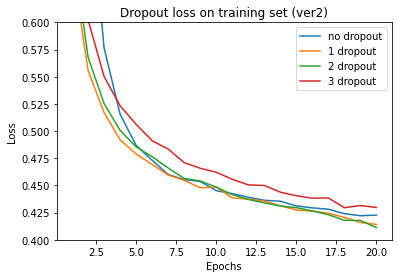

In [72]:
# Dropout effect on training loss


import matplotlib.pyplot as plt


history_dict_seasonal_ver2_onedr = history_seasonal_ver2_onedr.history
history_dict_seasonal_ver2_twodr = history_seasonal_ver2_twodr.history
history_dict_seasonal_ver2_threedr = history_seasonal_ver2_threedr.history


loss_values_seasonal_ver2_onedr = history_dict_seasonal_ver2_onedr["loss"]
loss_values_seasonal_ver2_twodr = history_dict_seasonal_ver2_twodr["loss"]
loss_values_seasonal_ver2_threedr = history_dict_seasonal_ver2_threedr["loss"]

epochs = range(1, len(loss_values_seasonal_ver2_onedr) + 1)


plt.plot(epochs, loss_values_seasonal_ver2_one, label="no dropout")
plt.plot(epochs, loss_values_seasonal_ver2_onedr, label="1 dropout")
plt.plot(epochs, loss_values_seasonal_ver2_twodr, label="2 dropout")
plt.plot(epochs, loss_values_seasonal_ver2_threedr, label="3 dropout")

plt.title("Dropout loss on training set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.ylim([0.4,0.6])
plt.legend()
plt.show()

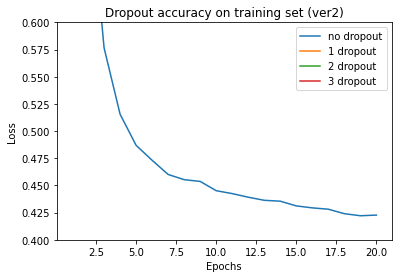

In [65]:
# Dropout effect on training accuracy


import matplotlib.pyplot as plt


acc_values_seasonal_ver2_onedr = history_dict_seasonal_ver2_onedr["accuracy"]
acc_values_seasonal_ver2_twodr = history_dict_seasonal_ver2_twodr["accuracy"]
acc_values_seasonal_ver2_threedr = history_dict_seasonal_ver2_threedr["accuracy"]

epochs = range(1, len(acc_values_seasonal_ver2_onedr) + 1)


plt.plot(epochs, loss_values_seasonal_ver2_one, label="no dropout")
plt.plot(epochs, acc_values_seasonal_ver2_onedr, label="1 dropout")
plt.plot(epochs, acc_values_seasonal_ver2_twodr, label="2 dropout")
plt.plot(epochs, acc_values_seasonal_ver2_threedr, label="3 dropout")

plt.title("Dropout accuracy on training set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.ylim([0.4,0.6])
plt.legend()
plt.show()

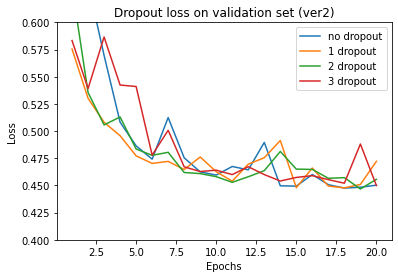

In [66]:
# Dropout effect on validation loss


import matplotlib.pyplot as plt



val_loss_values_seasonal_ver2_onedr = history_dict_seasonal_ver2_onedr["val_loss"]
val_loss_values_seasonal_ver2_twodr = history_dict_seasonal_ver2_twodr["val_loss"]
val_loss_values_seasonal_ver2_threedr = history_dict_seasonal_ver2_threedr["val_loss"]

epochs = range(1, len(val_loss_values_seasonal_ver2_onedr) + 1)


plt.plot(epochs, val_loss_values_seasonal_ver2_one, label="no dropout")
plt.plot(epochs, val_loss_values_seasonal_ver2_onedr, label="1 dropout")
plt.plot(epochs, val_loss_values_seasonal_ver2_twodr, label="2 dropout")
plt.plot(epochs, val_loss_values_seasonal_ver2_threedr, label="3 dropout")

plt.title("Dropout loss on validation set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.ylim([0.4,0.6])
plt.legend()
plt.show()

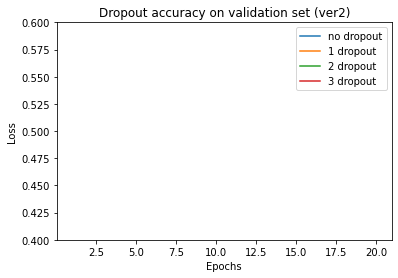

In [67]:
# Dropout effect on validation accuracy


import matplotlib.pyplot as plt


val_acc_values_seasonal_ver2_onedr = history_dict_seasonal_ver2_onedr["val_accuracy"]
val_acc_values_seasonal_ver2_twodr = history_dict_seasonal_ver2_twodr["val_accuracy"]
val_acc_values_seasonal_ver2_threedr = history_dict_seasonal_ver2_threedr["val_accuracy"]

epochs = range(1, len(val_acc_values_seasonal_ver2_onedr) + 1)


plt.plot(epochs, val_acc_values_seasonal_ver2_one, label="no dropout")
plt.plot(epochs, val_acc_values_seasonal_ver2_onedr, label="1 dropout")
plt.plot(epochs, val_acc_values_seasonal_ver2_twodr, label="2 dropout")
plt.plot(epochs, val_acc_values_seasonal_ver2_threedr, label="3 dropout")

plt.title("Dropout accuracy on validation set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.ylim([0.4,0.6])
plt.legend()
plt.show()

# 2) 코드2 ~> 인공신경망 모델

In [ ]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

In [ ]:
training_features_data = pd.read_csv(dpath+"training_set_features.csv")
training_set_labels = pd.read_csv(dpath+"training_set_labels.csv")
test_features_data = pd.read_csv(dpath+"test_set_features.csv")

In [ ]:
# 결측치 처리

# float types -> mean 값으로 대체
training_features_data=training_features_data.fillna(training_features_data.mean())

# string types -> null값을 'out-of-category'
training_features_data=training_features_data.fillna('out-of-category')

In [ ]:
training_features_data.isna().sum()

In [ ]:
# encoding categorical features (str -> float)

enc = OrdinalEncoder()

enc.fit(training_features_data)
training_features_data_arr=enc.transform(training_features_data)

col_names_list=training_features_data.columns
encoded_categorical_df=pd.DataFrame(training_features_data_arr, columns=col_names_list)

In [ ]:
# normalization(make all values bet. 0-1)

scaler = StandardScaler()
scaler.fit(encoded_categorical_df)
normalized_arr=scaler.transform(encoded_categorical_df)

normalized_df=pd.DataFrame(normalized_arr, columns=col_names_list)

In [ ]:
# check if data types are correct or not 

normalized_df.info()

In [ ]:
#check types of test dataset
test_features_data.info()

In [ ]:
# 결측치 처리

# float types -> mean 값으로 대체
test_features_data=test_features_data.fillna(test_features_data.mean())

## string types -> null값을 'out-of-category'
test_features_data=test_features_data.fillna('out-of-category')

In [ ]:
test_features_data.isna().sum()

In [ ]:
#encoding categorical features  (str -> float)
enc = OrdinalEncoder()
enc.fit(test_features_data)
test_features_data_arr=enc.transform(test_features_data)

col_names_list=test_features_data.columns
test_encoded_categorical_df=pd.DataFrame(test_features_data_arr, columns=col_names_list)

In [ ]:
#check data types
test_encoded_categorical_df.info()

In [ ]:
#normalization(bet. 0-1)

#using minmax scaler(look up)
test_normalized_arr=scaler.transform(test_encoded_categorical_df)
test_normalized_df=pd.DataFrame(test_normalized_arr, columns=col_names_list)

In [ ]:
# split df to X and Y
y = training_set_labels.loc[:, 'seasonal_vaccine'].values
X = normalized_df

In [ ]:
# 80: training set, 20: test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

# 5 fold CV
cv = StratifiedShuffleSplit(n_splits=5, random_state = 42)

In [ ]:
# display test scores and return result string and indexes of false samples
def display_test_scores(test, pred):
    str_out = ""
    str_out += ("TEST SCORES\n")
    str_out += ("\n")

    #print AUC score
    auc = roc_auc_score(test, pred)
    str_out += ("AUC: {:.4f}\n".format(auc))
    str_out += ("\n")
    
    false_indexes = np.where(test != pred)
    return str_out, false_indexes

In [ ]:
# NN with 1 layer
nn_1 = MLPRegressor(tol=1e-5, hidden_layer_sizes=10, random_state=0, solver='adam', activation='relu', max_iter=1000, batch_size=2048)
nn_1.fit(X, y)

# prediction results
y_pred = nn_1.predict(test_normalized_df)

In [ ]:
# NN with 1 layer
nn_2 = MLPRegressor(tol=1e-5, hidden_layer_sizes=10, random_state=0, solver='adam', activation='logistic', max_iter=1000, batch_size=512)
nn_2.fit(X, y)

# prediction results
y_pred_2 = nn_2.predict(test_normalized_df)

In [ ]:
np.sum(np.logical_or(np.array(y_pred_2) > 1, np.array(y_pred_2) < 0), axis=0)
y_pred_2 = 1/(1+np.exp(-y_pred_2))

In [ ]:
df_pred_seasonal_vaccine=pd.DataFrame(y_pred_2, columns=['seasonal_vaccine'])
df_pred_seasonal_vaccine["respondent_id"] = df_pred_seasonal_vaccine.index

df_pred_seasonal_vaccine=df_pred_seasonal_vaccine[['respondent_id', 'seasonal_vaccine']]

df_pred_seasonal_vaccine.to_csv('df_seasonal_nn_log.csv', columns=['respondent_id', 'seasonal_vaccine'], 
                            index=False, sep=',')

In [ ]:
df_pred_seasonal_vaccine.head()

In [ ]:
df_pred_h1n1 = pd.read_csv(dpath+"df_h1n1_nn_log_son.csv",
                    sep=',')

df_pred_h1n1.head()

In [ ]:
df_final = df_pred_h1n1.merge(df_pred_seasonal_vaccine, on="respondent_id", how = 'inner')

df_final['respondent_id'] = df_final['respondent_id'].astype(int) + 26707

In [ ]:
df_final.to_csv('df_nn_log.csv', columns=['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine' ], 
                            index=False, sep=',')

In [ ]:
df_final.head()

### 예측하기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
test_h1n1 = pd.read_csv(dpath+"test_ver1_h1n1.csv")
test_seasonal = pd.read_csv(dpath+"test_ver1_seasonal.csv")

#### h1n1 예측하기

In [ ]:
## h1n1 인코딩하기

## age_group

test_h1n1.loc[test_h1n1['age_group'] == '18 - 34 Years', 'age_group'] = 1
test_h1n1.loc[test_h1n1['age_group'] == '35 - 44 Years', 'age_group'] = 2
test_h1n1.loc[test_h1n1['age_group'] == '45 - 54 Years', 'age_group'] = 3
test_h1n1.loc[test_h1n1['age_group'] == '55 - 64 Years', 'age_group'] = 4
test_h1n1.loc[test_h1n1['age_group'] == '65+ Years', 'age_group'] = 5


## race

test_h1n1.loc[test_h1n1['race'] == 'White', 'race'] = 1
test_h1n1.loc[test_h1n1['race'] == 'Black', 'race'] = 2
test_h1n1.loc[test_h1n1['race'] == 'Other or Multiple', 'race'] = 3
test_h1n1.loc[test_h1n1['race'] == 'Hispanic', 'race'] = 4


## sex

test_h1n1.loc[test_h1n1['sex'] == 'Female', 'sex'] = 1
test_h1n1.loc[test_h1n1['sex'] == 'Male', 'sex'] = 2


## hhs_geo_region

from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(test_h1n1['hhs_geo_region'])

print(le.classes_)
test_h1n1['hhs_geo_region'] = le.transform(test_h1n1['hhs_geo_region'])


## census_msa

test_h1n1.loc[test_h1n1['census_msa'] == 'Non-MSA', 'census_msa'] = 1
test_h1n1.loc[test_h1n1['census_msa'] == 'MSA, Not Principle  City', 'census_msa'] = 2
test_h1n1.loc[test_h1n1['census_msa'] == 'MSA, Principle City', 'census_msa'] = 3


In [ ]:
# 모델 훈련을 위해 데이터타입 변환해주기

test_h1n1['age_group'] = test_h1n1['age_group'].astype(np.int64)
test_h1n1['race'] = test_h1n1['race'].astype(np.int64)
test_h1n1['sex'] = test_h1n1['sex'].astype(np.int64)
test_h1n1['census_msa'] = test_h1n1['census_msa'].astype(np.int64)

In [ ]:
test_h1n1.head()

In [ ]:
test_h1n1 = test_h1n1.drop(['respondent_id'], axis = 1)
test_h1n1.head()

In [ ]:
pred_h1n1 = model_h1n1.predict(test_h1n1)

In [ ]:
pred_h1n1

In [ ]:
test_features['h1n1_vaccine'] = pred_h1n1

#### seasonal 예측하기

In [ ]:
## seasonal 인코딩하기

## age_group

test_seasonal.loc[test_seasonal['age_group'] == '18 - 34 Years', 'age_group'] = 1
test_seasonal.loc[test_seasonal['age_group'] == '35 - 44 Years', 'age_group'] = 2
test_seasonal.loc[test_seasonal['age_group'] == '45 - 54 Years', 'age_group'] = 3
test_seasonal.loc[test_seasonal['age_group'] == '55 - 64 Years', 'age_group'] = 4
test_seasonal.loc[test_seasonal['age_group'] == '65+ Years', 'age_group'] = 5


## race

test_seasonal.loc[test_seasonal['race'] == 'White', 'race'] = 1
test_seasonal.loc[test_seasonal['race'] == 'Black', 'race'] = 2
test_seasonal.loc[test_seasonal['race'] == 'Other or Multiple', 'race'] = 3
test_seasonal.loc[test_seasonal['race'] == 'Hispanic', 'race'] = 4


## sex

test_seasonal.loc[test_seasonal['sex'] == 'Female', 'sex'] = 1
test_seasonal.loc[test_seasonal['sex'] == 'Male', 'sex'] = 2


## hhs_geo_region

from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(test_seasonal['hhs_geo_region'])

print(le.classes_)
test_seasonal['hhs_geo_region'] = le.transform(test_seasonal['hhs_geo_region'])


## census_msa

test_seasonal.loc[test_seasonal['census_msa'] == 'Non-MSA', 'census_msa'] = 1
test_seasonal.loc[test_seasonal['census_msa'] == 'MSA, Not Principle  City', 'census_msa'] = 2
test_seasonal.loc[test_seasonal['census_msa'] == 'MSA, Principle City', 'census_msa'] = 3


In [ ]:
# 모델 훈련을 위해 데이터타입 변환해주기

test_seasonal['age_group'] = test_seasonal['age_group'].astype(np.int64)
test_seasonal['race'] = test_seasonal['race'].astype(np.int64)
test_seasonal['sex'] = test_seasonal['sex'].astype(np.int64)
test_seasonal['census_msa'] = test_seasonal['census_msa'].astype(np.int64)

In [ ]:
test_seasonal.info()

In [ ]:
test_seasonal = test_seasonal.drop(['respondent_id'], axis = 1)
test_seasonal.head()

In [ ]:
pred_seasonal = model_seasonal.predict(test_seasonal)

In [ ]:
pred_seasonal

In [ ]:
test_features['seasonal_vaccine'] = pred_seasonal

In [ ]:
test_features.head()

#### 제출 파일 만들기

In [ ]:
submission = test_features[['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine']]

In [ ]:
submission.head()

In [ ]:
submission.to_csv('submission.csv', index=False)

## 셀 실행 후 왼쪽 파일 모양 클릭하고 'submission.csv' 파일을 다운받으면 됨.